# Lending Club Case Study
_________________________________

Created by: Anindya Dasgupta

This case study mainly focuses on below areas of Exploratory Data Analysis:
        1. Understanding data and variables
        2. Cleaning the dataset
        3. Univariate and Segmented Univariate Analysis
        4. Bivariate Analysis
        5. Recommendations based on plots and analysis
        

In [1]:
#importing required libraries
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid',palette='muted')

import os
    from IPython.display import display
import datetime as dt

#pd.set_option('expand_frame_repr', False)


pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 150

filePath = os.path.abspath("Files")

Place the files in the same path within folder "Files"

In [2]:
#Loading data into dataframe
loanDf = pd.read_csv(f'{filePath}\\loan.csv', sep=',', encoding = 'ANSI')

# 1. Understanding data and variables

In [3]:
display(loanDf.shape)
display(loanDf.head())

(39717, 111)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [4]:
loanDf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
loanDf.nunique(axis=0)

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [6]:
loanDf.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

# 2. Cleaning the dataset

In [7]:
loanDf.shape

(39717, 111)

##### Checking for total number of nulls in the given data

In [8]:
loanDf.isnull().sum().sort_values(ascending = False)

total_il_high_credit_limit        39717
mo_sin_old_rev_tl_op              39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717
total_bc_limit                    39717
dti_joint                         39717


##### Getting the list of column names where all the columns values are Null

In [9]:
NAValues = loanDf.columns[loanDf.isnull().all()]
NAValues

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

###### Taking a backup of exisitng data and dropping the columns with Nulls

In [10]:
loanDfCp = loanDf.copy()
loanDf.drop(NAValues, inplace = True, axis =1)
loanDf.shape

(39717, 57)

In [11]:
loanDf

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT     24000.0   
1                           Ryder   < 1 year           RENT     30000.0   
2                             NaN  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                         NaN   < 1 year       MORTGAGE    100000.0   
39715                         NaN   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11      Current          n   
...                   ...     ...          ...        ...   
39712        Not Verified  Jul-07   Fully Paid          n   
39713        Not Verified  Jul-07   Fully Paid          n   
39714        Not Verified  Jul-07   Fully Paid          n   
39715        Not Verified  Jul-07   Fully Paid          n   
39716        Not Verified  Jun-07   Fully Paid          n   

                                                     url  \
0      https://lendingclub.com/browse/loanDetail.acti...   
1      https://lendingclub.com/browse/loanDetail.acti...   
2      https://lendingclub.com/browse/loanDetail.acti...   
3      https://lendingclub.com/browse/loanDetail.acti...   
4      https://lendingclub.com/browse/loanDetail.acti...   
...                                                  ...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
0        Borrower added on 

#### Percentage of missing values

In [12]:
100*(loanDf.isnull().sum()/len(loanDf))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Analysis of columns which has almost same data throughout the dataset

In [13]:
loanDf.delinq_2yrs.value_counts().head(1)

0    35405
Name: delinq_2yrs, dtype: int64

In [14]:
display(loanDf.mths_since_last_delinq.isnull().sum())
loanDf.mths_since_last_delinq.value_counts().head(1)

25682

0.0    443
Name: mths_since_last_delinq, dtype: int64

In [15]:
display(loanDf.mths_since_last_record.isnull().sum())
loanDf.mths_since_last_record.value_counts().head(1)

36931

0.0    670
Name: mths_since_last_record, dtype: int64

In [16]:
loanDf.pub_rec.value_counts().head(1)

0    37601
Name: pub_rec, dtype: int64

In [17]:
loanDf.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [18]:
loanDf.out_prncp.value_counts().head(1)

0.0    38577
Name: out_prncp, dtype: int64

In [19]:
loanDf.out_prncp_inv.value_counts().head(1)

0.0    38577
Name: out_prncp_inv, dtype: int64

In [20]:
loanDf.total_rec_late_fee.value_counts().head(1)

0.0    37671
Name: total_rec_late_fee, dtype: int64

In [21]:
loanDf.recoveries.value_counts().head(1)

0.0    35499
Name: recoveries, dtype: int64

In [22]:
loanDf.collection_recovery_fee.value_counts().head(1)

0.0    35935
Name: collection_recovery_fee, dtype: int64

In [23]:
loanDf.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [24]:
loanDf.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [25]:
loanDf.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [26]:
loanDf.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [27]:
loanDf.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [28]:
loanDf.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [29]:
loanDf.pub_rec_bankruptcies.value_counts().head(1)

0.0    37339
Name: pub_rec_bankruptcies, dtype: int64

In [30]:
loanDf.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

##### Dropping columns which has mostly same values or are not related to Loan Default analysis as this values will lead to skewness in the data analysis

In [31]:
notRequiredColumns = ['delinq_2yrs','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
                      'initial_list_status','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries',
                     'collection_recovery_fee','collections_12_mths_ex_med','policy_code','application_type',
                     'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens',
                     'url','desc','pymnt_plan','id','revol_bal','revol_util','inq_last_6mths','next_pymnt_d',
                      'earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']

loanDf.drop(notRequiredColumns, inplace= True, axis=1)

In [32]:
display(loanDf.shape)

(39717, 27)

##### Converting required date related columns to desired datetime format

In [33]:
loanDf['issue_d'] = pd.to_datetime(loanDf['issue_d'], format="%b-%y")

In [34]:
loanDf.loc[:,'issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

##### Standardizing the data in column emp_length

In [35]:
loanDf['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Considering < 1 year as 0 and 10+ years as 10. We standardised the values for better analysis:-

In [36]:
loanDf['emp_length']= loanDf['emp_length'].str.replace('< 1 year','0')
loanDf['emp_length']= loanDf['emp_length'].str.extract('(\d+)')

In [37]:
loanDf['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

Removing % in int_rate

In [38]:
loanDf['int_rate'] = loanDf['int_rate'].str.replace('%',"").astype(float)

##### Removing months from the term values

In [39]:
loanDf.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [40]:
loanDf['term'] = loanDf['term'].str.replace(' months','').astype('int64')

In [41]:
loanDf.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

### Derived Metrics

Let's create a year and month column for issue_d as well and check what is the maximum year we have

In [42]:
loanDf['issue_dt_Yr'] = loanDf['issue_d'].dt.year
loanDf['issue_dt_Mth'] = loanDf['issue_d'].dt.month
loanDf.issue_dt_Yr.value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_dt_Yr, dtype: int64

Let's derive a column to see the ratio between loan amount borrower asked for and that approved by the investor

In [43]:
loanDf['loan_amnt_to_funded_amnt_inv_ratio'] = loanDf['funded_amnt_inv'] / loanDf['loan_amnt']
loanDf['loan_amnt_to_funded_amnt_inv_ratio'].value_counts()

1.000000    19528
0.997500      369
0.995000      359
0.995833      312
0.997917      266
            ...  
0.963798        1
0.775920        1
0.996853        1
0.997015        1
0.986264        1
Name: loan_amnt_to_funded_amnt_inv_ratio, Length: 9937, dtype: int64

In [44]:
loanDf.loc[(loanDf.loan_amnt_to_funded_amnt_inv_ratio <= 1),:]

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0        1296599       5000         5000           4975.0    36     10.65   
1        1314167       2500         2500           2500.0    60     15.27   
2        1313524       2400         2400           2400.0    36     15.96   
3        1277178      10000        10000          10000.0    36     13.49   
4        1311748       3000         3000           3000.0    60     12.69   
...          ...        ...          ...              ...   ...       ...   
39712      92174       2500         2500           1075.0    36      8.07   
39713      90607       8500         8500            875.0    36     10.28   
39714      90390       5000         5000           1325.0    36      8.07   
39715      89243       5000         5000            650.0    36      7.43   
39716      86999       7500         7500            800.0    36     13.75   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2                         NaN         10   
1            59.83     C        C4                       Ryder          0   
2            84.33     C        C5                         NaN         10   
3           339.31     C        C1         AIR RESOURCES BOARD         10   
4            67.79     B        B5    University Medical Group          1   
...            ...   ...       ...                         ...        ...   
39712        78.42     A        A4             FiSite Research          4   
39713       275.38     C        C1  Squarewave Solutions, Ltd.          3   
39714       156.84     A        A4                         NaN          0   
39715       155.38     A        A2                         NaN          0   
39716       255.43     E        E2            Evergreen Center          0   

      home_ownership  annual_inc verification_status    issue_d  loan_status  \
0               RENT     24000.0            Verified 2011-12-01   Fully Paid   
1               RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2               RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3               RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
4               RENT     80000.0     Source Verified 2011-12-01      Current   
...              ...         ...                 ...        ...          ...   
39712       MORTGAGE    110000.0        Not Verified 2007-07-01   Fully Paid   
39713           RENT     18000.0        Not Verified 2007-07-01   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified 2007-07-01   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified 2007-07-01   Fully Paid   
39716            OWN     22000.0        Not Verified 2007-06-01   Fully Paid   

                  purpose                      title zip_code addr_state  \
0             credit_card                   Computer    860xx         AZ   
1                     car                       bike    309xx         GA   
2          small_business       real estate business    606xx         IL   
3                   other                   personel    917xx         CA   
4                   other                   Personal    972xx         OR   
...                   ...                        ...      ...        ...   
39712    home_improvement           Home Improvement    802xx         CO   
39713         credit_card  Retiring credit card debt    274xx         NC   
39714  debt_consolidation     MBA Loan Consolidation    017xx         MA   
39715               other                   JAL Loan    208xx         MD   
39716  debt_consolidation         Consolidation Loan    027xx         MA   

         dti  total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0      27.65          9   5863.155187          5833.84          5000.00   
1       1.00          4   1008.710000          1008.71           456.46   
2       8.72         10   3005.666844          3005.67    

In [45]:
loanDf.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Let's get rid of **Current** loan status types, as becasue we can't call them defaulters with certainty

In [46]:
loanDf = loanDf.loc[(loanDf.loan_status == 'Fully Paid') | (loanDf.loan_status == 'Charged Off')]

# 3. Univariate and Segmented Univariate Analysis

In this section we will try to figure out the important variables for the Loan Default Analysis. For this we would consider **loan_status** as the driving column.

As part of Univariate Analysis we will consider the following **loan_status** types:-

**Fully-paid**

**Charged-off** 

as 'Current types can't be labelled as defaulted'. Although we will try to do some bivariate analysis to see the chances of Current type to default.

In [47]:
#creating a copy a loanDf,solely for Univariate Analysis
loanDfUnivariate = loanDf
loanDfUnivariate.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [48]:
loanDfUnivariate.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'issue_dt_Yr', 'issue_dt_Mth',
       'loan_amnt_to_funded_amnt_inv_ratio'],
      dtype='object')

For all the defaulter analysis let's create new df with only charged off records

In [49]:
loanDfUnivariateLoanAmntChargedOff  = loanDfUnivariate.loc[(loanDfUnivariate.loan_status == 'Charged Off'),:]

Let's create a function to plot the default rate for each variables

In [50]:
def default_rate_plot(ChargedOffDf,variable):
    countsDf = pd.DataFrame(ChargedOffDf.groupby(variable).loan_status.count())
    countsDf.columns = ['Counts']
    countsDf.reset_index(inplace=True)    
    plt.figure(figsize=(6, 5))
    g = sns.barplot(x= countsDf[variable], 
            y=countsDf['Counts']/sum(countsDf['Counts'])*100, 
            data=loanDfUnivariate,
            estimator =np.mean,
                palette='Paired')
    g.set_xlabel(variable,fontsize=12)
    g.set_ylabel('Default Rate',fontsize=12)
    plt.title('Default Rate for '+variable)

In [51]:
#for larger number of bins
def default_rate_plot_for_more_bins(ChargedOffDf,variable):
    countsDf = pd.DataFrame(ChargedOffDf.groupby(variable).loan_status.count())
    countsDf.columns = ['Counts']
    countsDf.reset_index(inplace=True)    
    plt.figure(figsize=(16, 7))
    g = sns.barplot(x= countsDf[variable], 
            y=countsDf['Counts']/sum(countsDf['Counts'])*100, 
            data=loanDfUnivariate,
            estimator =np.mean,
                palette='Paired')
    g.set_xlabel(variable,fontsize=12)
    g.set_ylabel('Default Rate',fontsize=12)
    plt.title('Default Rate for '+variable)
    plt.xticks(rotation=90)

***Let's now continue our analysis in the search of the important variables***

### **Variable : loan_status**  
This is the driving column behind all the analysis

**Default rate for charged off loans by loan_status**

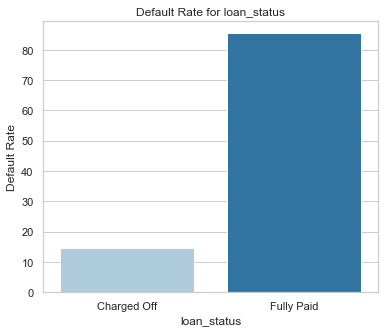

In [52]:
default_rate_plot(loanDfUnivariate,'loan_status')

In [53]:
loanUniVariateCounts = pd.DataFrame(loanDfUnivariate.groupby('loan_status').loan_status.count())
loanUniVariateCounts.columns =  ['Counts']
loanUniVariateCounts.reset_index(inplace=True)
loanUniVariateCounts

loan_status  Counts
0  Charged Off    5627
1   Fully Paid   32950

**Percentage of Charged off loans** which are defaulted

In [54]:
round(100*(loanUniVariateCounts.loc[(loanUniVariateCounts.loan_status == 'Charged Off'),:].Counts)/sum(loanUniVariateCounts.Counts),2)

0    14.59
Name: Counts, dtype: float64

Text(0.5, 1.0, 'Counts based on loan status')

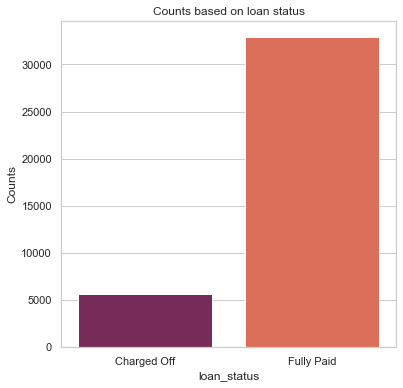

In [55]:
plt.figure(figsize=(6, 6))
sns.barplot(x=loanUniVariateCounts['loan_status'],y=loanUniVariateCounts['Counts'],palette="rocket")
plt.title('Counts based on loan status')

### **Variable : loan_amnt and funded_amnt_inv**

In [56]:
loanDfUnivariate.loan_amnt.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
10%       3090.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Default rate for charged off loans by loan_amnt**

Text(0.5, 1.0, 'Rates of loans taken for each loan type')

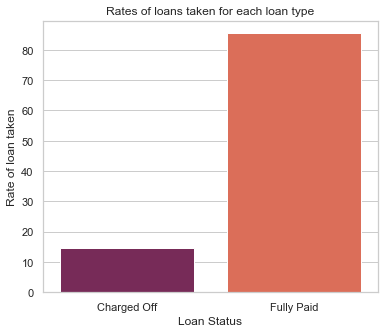

In [57]:
plt.figure(figsize=(6, 5))
g = sns.barplot(x= (loanDfUnivariate.groupby(['loan_status']).loan_amnt.count()/sum(loanUniVariateCounts.Counts)*100).index, 
            y=(loanDfUnivariate.groupby(['loan_status']).loan_amnt.count()/sum(loanUniVariateCounts.Counts)*100), 
            data=loanDfUnivariate,
            estimator =np.mean,
                palette='rocket')
g.set_xlabel('Loan Status',fontsize=12)
g.set_ylabel('Rate of loan taken',fontsize=12)
plt.title('Rates of loans taken for each loan type')

In [58]:
(loanDfUnivariate.groupby(['loan_status']).loan_amnt.count()/sum(loanUniVariateCounts.Counts)*100)

loan_status
Charged Off    14.586412
Fully Paid     85.413588
Name: loan_amnt, dtype: float64

Let's now try to find out what **segment** of loan_amnt defaulted the most

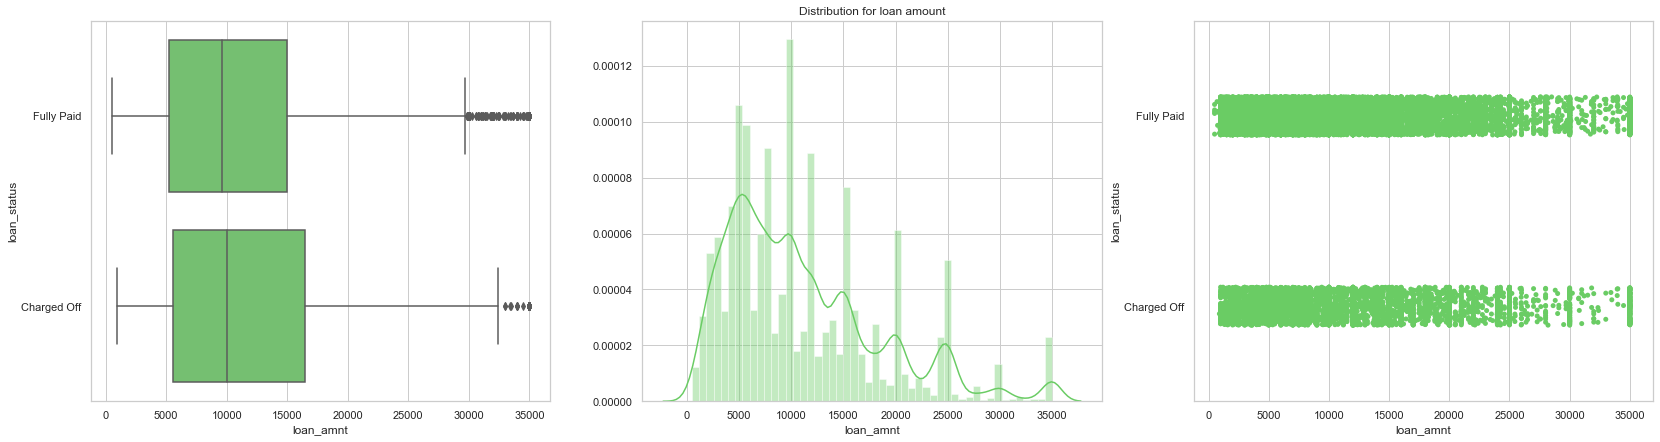

In [59]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='loan_amnt', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
plt.title('Distribution for loan amount')
sns.distplot(loanDfUnivariate.loan_amnt, color='g')
plt.subplot(1,3,3)
sns.stripplot(x='loan_amnt', y='loan_status', data=loanDfUnivariate,color='g')

**Outlier Treatments** -
Removing the outliers for the data having loan_amount greater than 25000

In [60]:
loanDfUnivariate  = loanDfUnivariate.loc[(loanDfUnivariate['loan_amnt'] <= 25000),:]

Let's see the distribution again

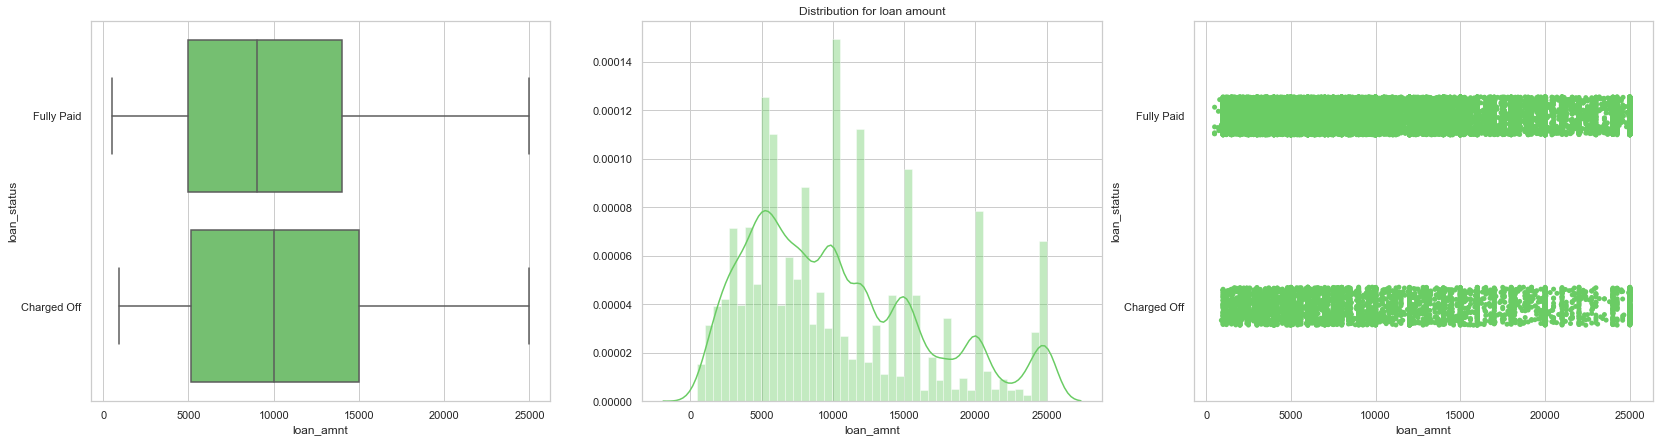

In [61]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='loan_amnt', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
plt.title('Distribution for loan amount')
sns.distplot(loanDfUnivariate.loan_amnt, color='g')
plt.subplot(1,3,3)
sns.stripplot(x='loan_amnt', y='loan_status', data=loanDfUnivariate,color='g')

Let's **derive** a new metric loan_amnt_bins to get the loan_amnt nearest to 1/100 th place

In [62]:
loanDfUnivariateLoanAmntChargedOff['loan_amnt_bins'] = ((round(loanDfUnivariateLoanAmntChargedOff['loan_amnt']/100))/10).apply(np.ceil)*10

Text(0.5, 1.0, 'Loan amount vs Count of charged off loans offered')

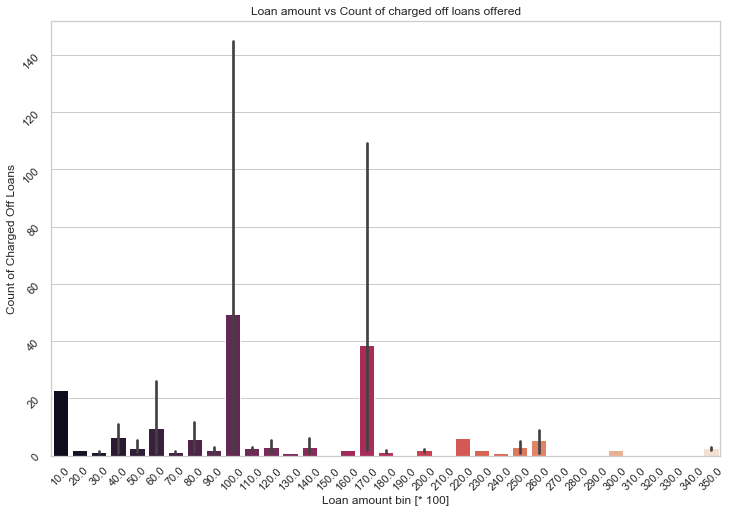

In [63]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x= loanDfUnivariateLoanAmntChargedOff.loan_amnt_bins,
                y= loanDfUnivariateLoanAmntChargedOff.groupby('loan_amnt').loan_amnt_bins.count(),
                palette='rocket')
g.set_xlabel('Loan amount bin [* 100]',fontsize=12)
g.set_ylabel('Count of Charged Off Loans',fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Loan amount vs Count of charged off loans offered')

**Relation between loan_amnt and funded_amnt_inv**

We had derived column loan_amnt_to_funded_amnt_inv_ratio let's make use of it to find out some insights.

We will create bins out of the ratio betweenn funded_amnt_inv and loan_amnt:-

100 is equivalent to 1.0

90 as 0.9

80 as 0.8

an so on..

In [64]:
loanDfUnivariateLoanAmntChargedOff['loan_amnt_to_funded_amnt_inv_ratio'] = loanDfUnivariateLoanAmntChargedOff['funded_amnt_inv'] / loanDfUnivariateLoanAmntChargedOff['loan_amnt']
loanDfUnivariateLoanAmntChargedOff['loan_amnt_to_funded_amnt_inv_ratio'] = ((round(loanDfUnivariateLoanAmntChargedOff['loan_amnt_to_funded_amnt_inv_ratio']*100))/10).apply(np.ceil)*10

In [65]:
loanDfUnivariateLoanAmntChargedOff['loan_amnt_to_funded_amnt_inv_ratio'].value_counts()

100.0    4714
90.0      195
70.0      177
80.0      109
20.0       78
60.0       72
40.0       64
30.0       61
10.0       58
50.0       51
0.0        48
Name: loan_amnt_to_funded_amnt_inv_ratio, dtype: int64

Now let's plot this ratio to find the default rate

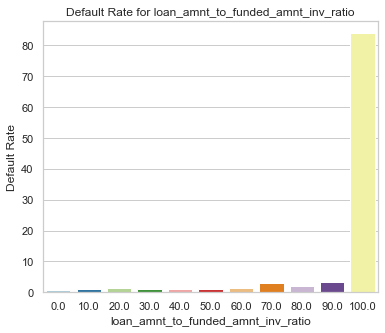

In [66]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'loan_amnt_to_funded_amnt_inv_ratio')

**Observations**

✓ From the "Loan amount vs Count of charged off loans offered" pot we see there are sharp spikes at 10000 and 17000

✓ **maximum number of charged off loans were taken for a loan amount of either 10000 or  17000 dollars**. Lending club must check the loan requested for the amounts 10000 and 17000$ thoroughly

✓ From the loan_amnt to funded_amnt_inv insight we find that more than **85%**
of the defaulted loans were granted where the loan_amnt requested by the borrower was approved by the investors


###  Variable : grade and sub_grade

In [67]:
loanDfUnivariate.grade.value_counts()

B    11376
A     9925
C     7607
D     4874
E     2312
F      804
G      244
Name: grade, dtype: int64

In [68]:
loanDfUnivariate.grade.describe()

count     37142
unique        7
top           B
freq      11376
Name: grade, dtype: object

**Default rate for charged off loans by Grade**

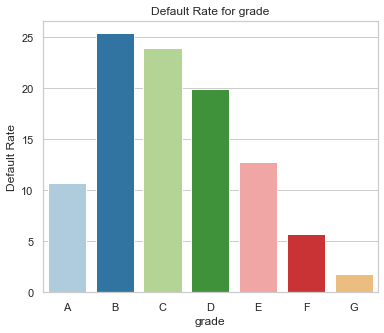

In [69]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'grade')

In [70]:
loanDfUnivariateLoanAmntChargedOff.groupby('grade').grade.count().sort_values(ascending=False)

grade
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

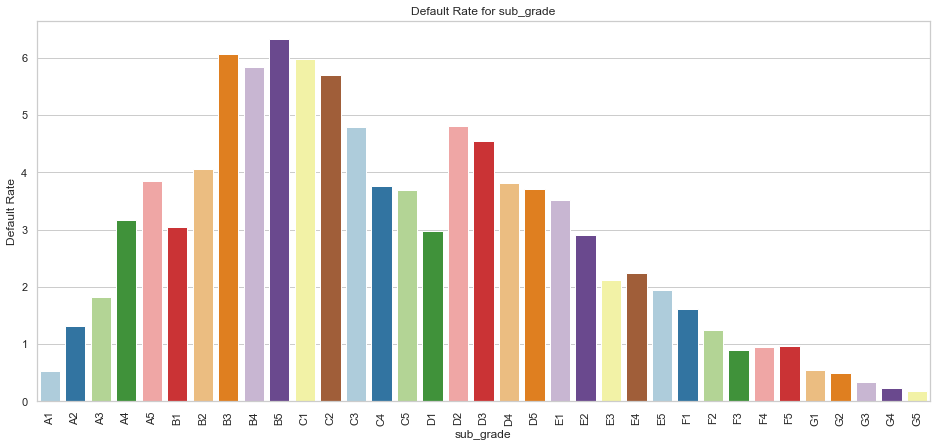

In [71]:
default_rate_plot_for_more_bins(loanDfUnivariateLoanAmntChargedOff,'sub_grade')

Let's now see drill down to each **sub-grade** under each grade

Text(0.5, 1.0, 'Count of loan in each Subgrade under a single grade')

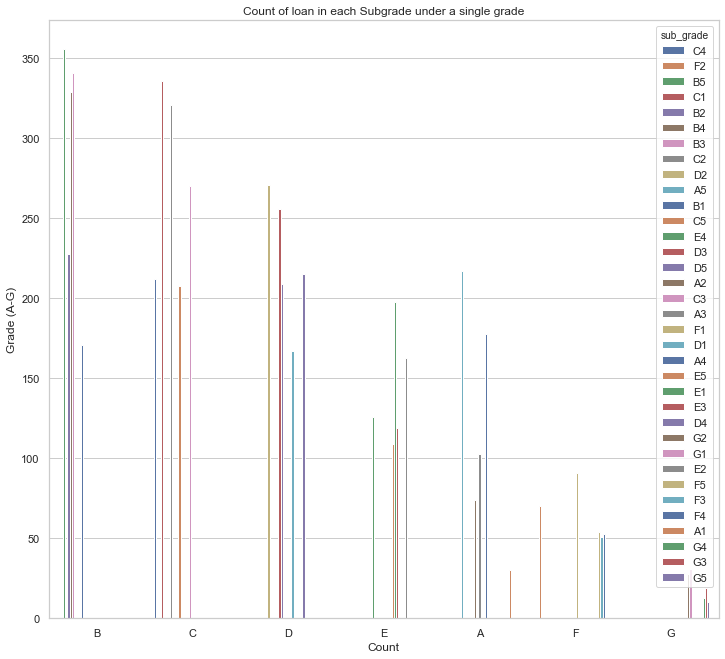

In [72]:
plt.figure(figsize=(12, 11))
g = sns.countplot(x=loanDfUnivariateLoanAmntChargedOff.grade,hue=loanDfUnivariateLoanAmntChargedOff.sub_grade, 
                   order = loanDfUnivariateLoanAmntChargedOff.grade.value_counts().index, 
                   palette="deep")
g.set_xlabel('Count',fontsize=12)
g.set_ylabel('Grade (A-G)',fontsize=12)
plt.title('Count of loan in each Subgrade under a single grade')

Now let's analyse the spread of loan_amnt across various sub_grades

In [73]:
loanAmtSubGradePivot = loanDfUnivariateLoanAmntChargedOff.pivot_table(values = 'loan_amnt', index = 'grade', columns = 'sub_grade',aggfunc = 'sum')
display(loanAmtSubGradePivot.max().sort_values(ascending=False))
display(loanAmtSubGradePivot.max().max())

sub_grade
B5    4136375.0
C1    3861275.0
B3    3857525.0
B4    3794025.0
C2    3581825.0
D3    3418650.0
E1    2978225.0
D5    2965400.0
D2    2911650.0
C3    2898750.0
D4    2751950.0
E2    2531275.0
C4    2309050.0
C5    2226000.0
B2    2211900.0
E4    2041625.0
E5    1991075.0
E3    1790425.0
A5    1764875.0
F1    1743400.0
D1    1597150.0
B1    1540900.0
A4    1420850.0
F2    1280450.0
F5    1107875.0
F4    1060100.0
F3     956125.0
A3     791300.0
G1     575375.0
G2     538250.0
A2     501825.0
G3     363725.0
G4     219125.0
A1     216700.0
G5     176350.0
dtype: float64

4136375.0

**Observations**

✓ Most of the loans defaulted falls under grade B and C. 
**B has the highest rate of defaulters.** More than 25% of the other grade types

✓ Most of the loans were granted under grade B sub_grade **B5**

### Variable : term

In [74]:
loanDfUnivariate.term.value_counts()

36    28693
60     8449
Name: term, dtype: int64

In [75]:
loanDfUnivariate.term.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37142.00000
mean        41.45948
std         10.06103
min         36.00000
5%          36.00000
10%         36.00000
25%         36.00000
50%         36.00000
75%         36.00000
90%         60.00000
95%         60.00000
99%         60.00000
max         60.00000
Name: term, dtype: float64

**Default rate for charged off loans by term**

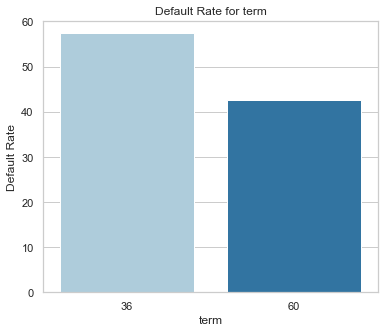

In [76]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'term')

Text(0, 0.5, 'Count')

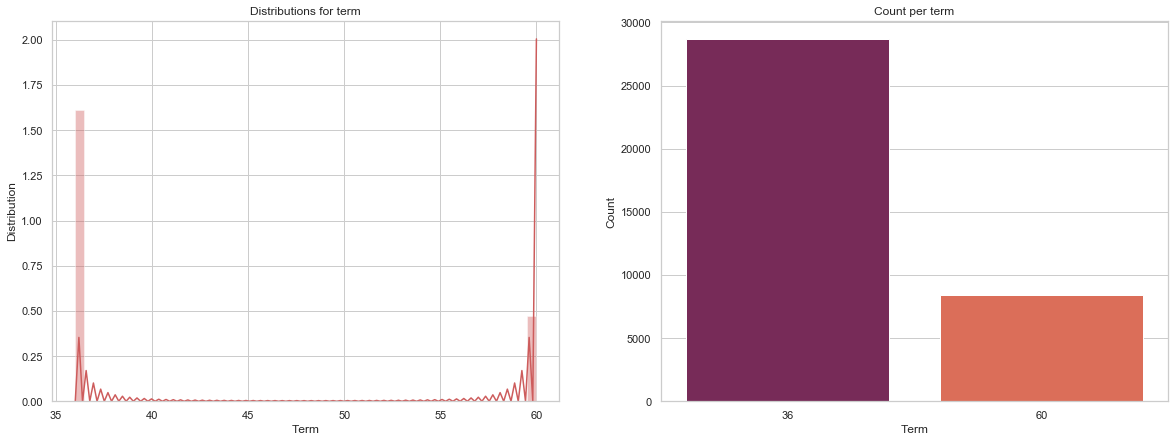

In [77]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
g1 = sns.distplot(loanDfUnivariate.term, color = 'indianred')
plt.title('Distributions for term')
plt.subplot(1,2,2)
g2 = sns.countplot(x=loanDfUnivariate.term,order = loanDfUnivariate.term.value_counts().index, palette="rocket")
plt.title('Count per term')
g1.set_xlabel('Term',fontsize=12)
g1.set_ylabel('Distribution',fontsize=12)
g2.set_xlabel('Term',fontsize=12)
g2.set_ylabel('Count',fontsize=12)

In [78]:
loanDfUnivariateLoanAmntChargedOff.groupby(['loan_status','term']).term.count().sort_values(ascending=False)

loan_status  term
Charged Off  36      3227
             60      2400
Name: term, dtype: int64

**Observations**

✓ Borrowers preferred to take loans for a term of 36 months.

✓ Around **60%** of the defaulted loans were taken for 36 months term

✓ Also the number of defaulted loans taken for **36 months** is more than that of 60 months

### Variable : int_rate

In [79]:
loanDfUnivariate['int_rate'] = loanDfUnivariate.int_rate.astype('float64')

In [80]:
loanDfUnivariate.int_rate.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    37142.000000
mean        11.792128
std          3.601086
min          5.420000
5%           6.170000
10%          6.990000
25%          8.900000
50%         11.710000
75%         14.260000
90%         16.490000
95%         17.990000
99%         20.620000
max         24.400000
Name: int_rate, dtype: float64

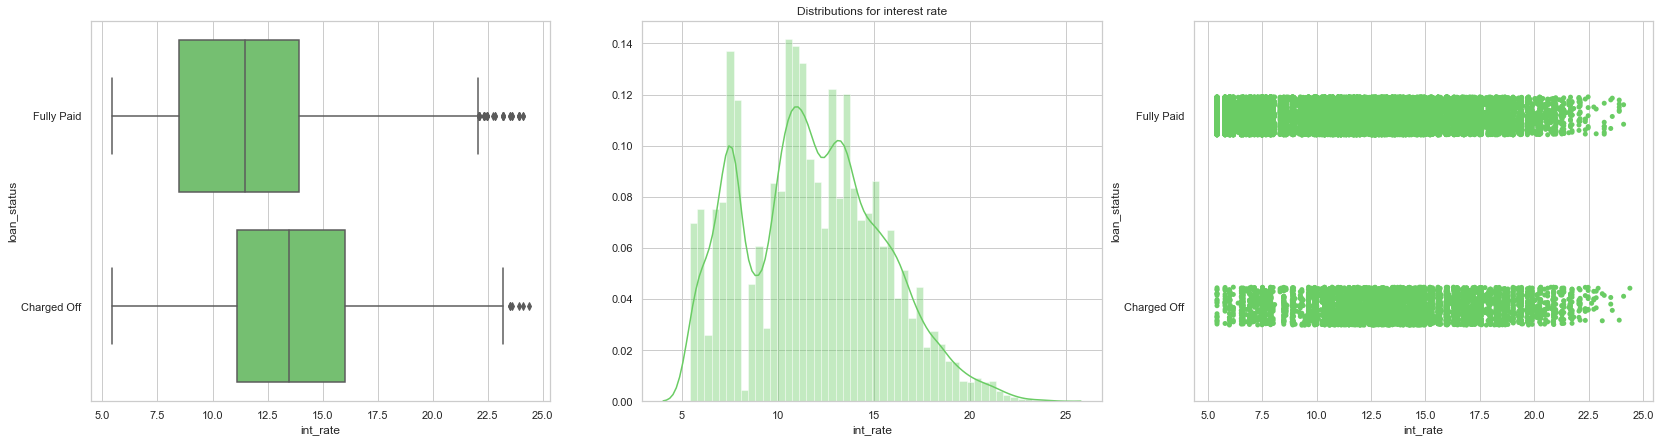

In [81]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='int_rate', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.int_rate, color='g')
plt.title('Distributions for interest rate')
plt.subplot(1,3,3)
sns.stripplot(x='int_rate', y='loan_status', data=loanDfUnivariate,color='g')

Let's **derive** a metric int_rate_SquaredOff - to hold the int_rate rounded to the nearest integer

In [82]:
loanDfUnivariate['int_rate_SquaredOff'] = round(loanDfUnivariate['int_rate'])
loanDfUnivariateLoanAmntChargedOff['int_rate_SquaredOff'] = round(loanDfUnivariateLoanAmntChargedOff['int_rate'])

**Default rate for charged off loans by interest rate**

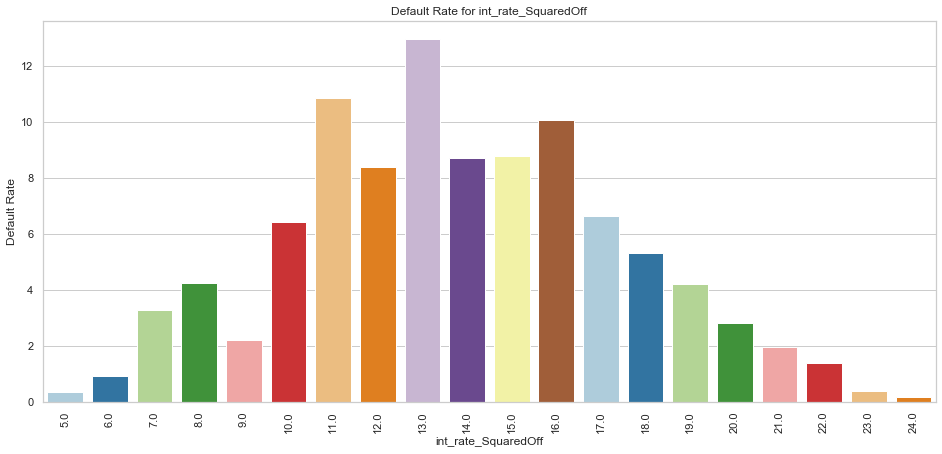

In [83]:
default_rate_plot_for_more_bins(loanDfUnivariateLoanAmntChargedOff,'int_rate_SquaredOff')

View of total loans approved and at what interest rate

Text(0.5, 1.0, 'Interest Rates vs Count of loans granted')

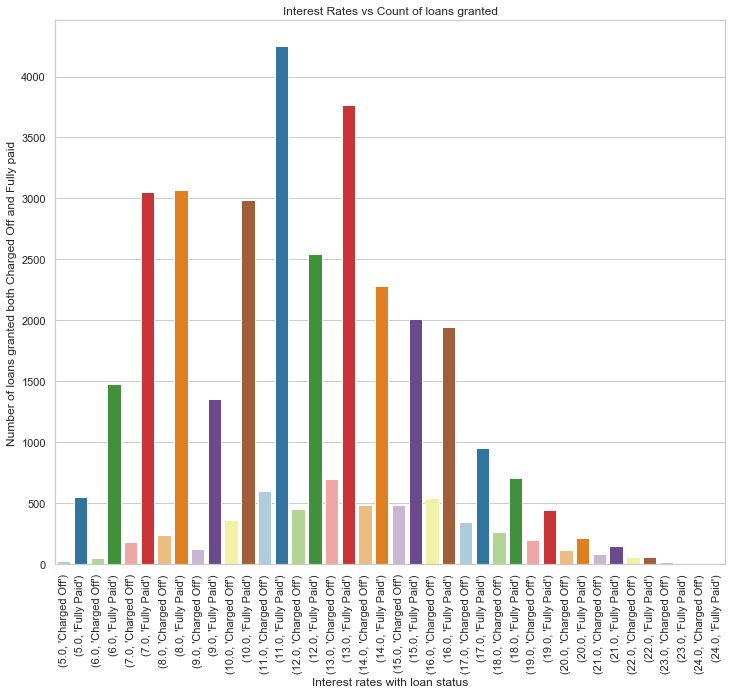

In [84]:
plt.figure(figsize=(12, 10))
g = sns.barplot(x= loanDfUnivariate.groupby(['int_rate_SquaredOff','loan_status']).loan_status.count().index,
                y= loanDfUnivariate.groupby(['int_rate_SquaredOff','loan_status']).loan_status.count(), 
                   palette="Paired")
g.set_xlabel('Interest rates with loan status',fontsize=12)
g.set_ylabel('Number of loans granted both Charged Off and Fully paid',fontsize=12)
plt.xticks(rotation=90)
plt.title('Interest Rates vs Count of loans granted')

In [85]:
loanDfUnivariateLoanAmntChargedOff.groupby(['loan_status','int_rate_SquaredOff']).loan_amnt.sum().sort_values(ascending=False)

loan_status  int_rate_SquaredOff
Charged Off  13.0                   8396925
             16.0                   6855100
             11.0                   6442450
             12.0                   5565200
             15.0                   5458350
             17.0                   5409100
             14.0                   5386425
             18.0                   4730900
             19.0                   4039700
             10.0                   3349400
             20.0                   3149425
             21.0                   2108825
             8.0                    1857475
             22.0                   1635400
             7.0                    1462950
             9.0                    1070875
             23.0                    477225
             6.0                     378950
             24.0                    202550
             5.0                     134150
Name: loan_amnt, dtype: int64

In [86]:
loanDfUnivariate.groupby('loan_status').int_rate_SquaredOff.mean()

loan_status
Charged Off    13.586916
Fully Paid     11.483887
Name: int_rate_SquaredOff, dtype: float64

**Observations**

✓  More than **10%** of the loans are likely to default if the rate of interest is between 11-13%

✓  fully paid loans were granted at an average of nearly 11.5% interest. And the charged-off loans the average rate of interest was more around **~13.5%.**

✓  Sum of loan amount lended at 13% is maximum for charged-off/defaulted category

✓ This gives us the indication if the rate of interest is between 11 to 13% chances are the borrowers are most likely to default

### Variable : annual_inc

In [87]:
loanDfUnivariate.annual_inc.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count      37142
mean       66850
std        62951
min         4000
5%         24000
10%        29664
25%        40000
50%        57000
75%        80000
90%       110000
95%       135000
99%       215390
max      6000000
Name: annual_inc, dtype: int64

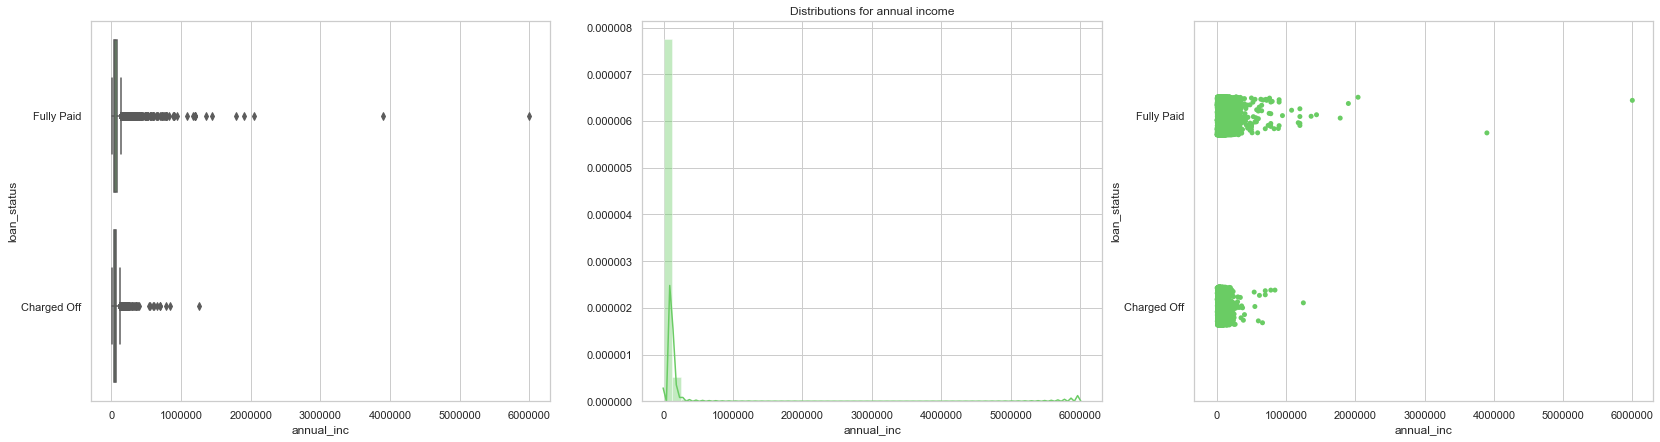

In [88]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='annual_inc', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.annual_inc, color='g')
plt.title('Distributions for annual income')
plt.subplot(1,3,3)
sns.stripplot(x='annual_inc', y='loan_status', data=loanDfUnivariate,color='g')

In [89]:
display(loanDfUnivariate.loc[(loanDfUnivariate['annual_inc'] > 140004),'member_id'].count())
loanDfUnivariate.loc[(loanDfUnivariate['annual_inc'] > 140004),'member_id']

1605

74       1303514
170      1301822
228      1300806
298      1299834
331      1298955
392      1298574
567      1294575
586      1294356
596      1294315
603      1282333
689      1292928
760      1292182
980      1289477
1069     1288324
1134     1287196
1151     1286814
1210     1285812
1217     1285626
1268     1284889
1366     1252052
1430     1282460
1433     1277879
1462     1277562
1546     1255604
1569     1280127
1609     1210895
1612     1279332
1617     1279331
1620     1279160
1721     1277969
1743      798733
1773     1277202
1788     1273525
1799     1276311
1884     1274844
1914     1274246
1949     1273308
1991     1270160
2131     1270310
2138     1270275
2147     1264981
2257     1268402
2331     1266879
2343     1267355
2363     1264123
2364     1266819
2486     1265246
2620     1263735
2629     1263519
2682     1256067
2781     1240939
2949     1258056
2983     1257453
3000     1257344
3079     1254915
3109     1254413
3133     1253761
3151     1253768
3152     12536

**Outlier treatment**

**Dropping above 1605 records which are outliers** and the reason behind skewness in data

In [90]:
loanDfUnivariate  = loanDfUnivariate.loc[(loanDfUnivariate['annual_inc'] <= 140004),:]
loanDfUnivariateLoanAmntChargedOff = loanDfUnivariateLoanAmntChargedOff.loc[(loanDfUnivariateLoanAmntChargedOff['annual_inc'] <= 140004),:]

In [91]:
loanDfUnivariateLoanAmntChargedOff.shape

(5418, 32)

In [92]:
loanDfUnivariate.annual_inc.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count     35537
mean      59948
std       27364
min        4000
5%        23793
10%       28800
25%       40000
50%       55000
75%       75000
90%      100000
95%      115000
99%      133963
max      140004
Name: annual_inc, dtype: int64

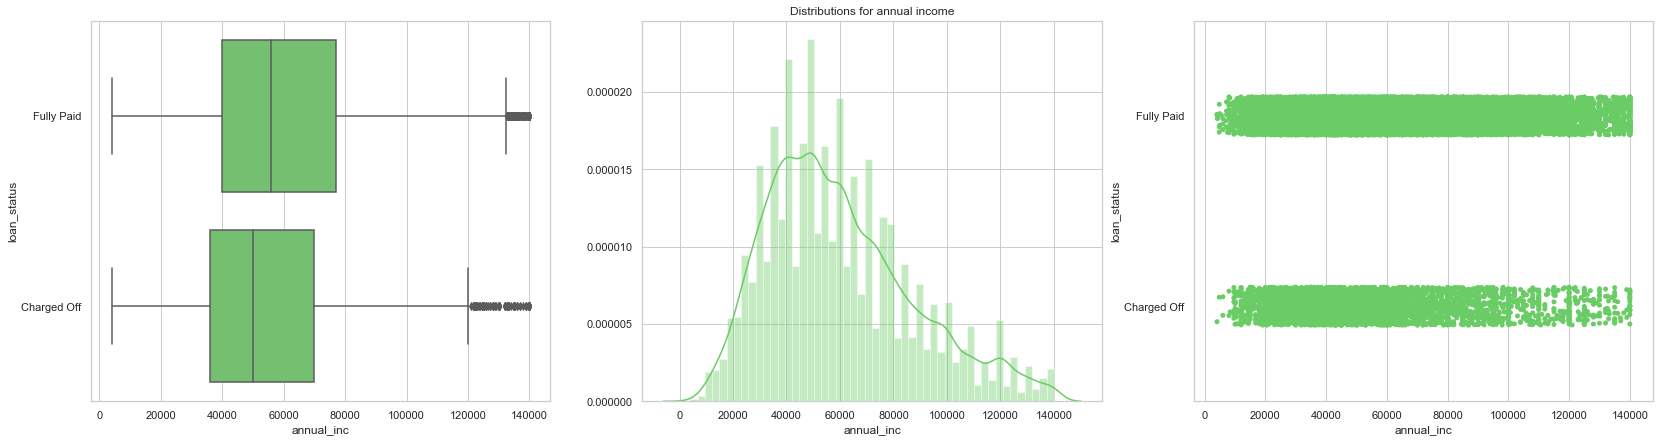

In [93]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='annual_inc', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.annual_inc, color='g')
plt.title('Distributions for annual income')
plt.subplot(1,3,3)
sns.stripplot(x='annual_inc', y='loan_status', data=loanDfUnivariate,color='g')

**Derived Metrics**

To create a new column to create bins for annual income for charged off loans by dividing by 10000

In [94]:
loanDfUnivariate['annual_inc_Squared_To_Nearest_10k'] = round(loanDfUnivariate['annual_inc']/10000)
loanDfUnivariateLoanAmntChargedOff['annual_inc_Squared_To_Nearest_10k'] = round(loanDfUnivariateLoanAmntChargedOff['annual_inc']/10000)

Let's see what insights we can draw from annual_income

In [95]:
loanDfUnivariateLoanAmntChargedOff.annual_inc_Squared_To_Nearest_10k.nunique()

15

In [96]:
loanDfUnivariateLoanAmntChargedOff.annual_inc_Squared_To_Nearest_10k.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count    5418
mean        5
std         2
min         0
5%          2
10%         3
25%         4
50%         5
75%         7
90%         9
95%        11
99%        13
max        14
Name: annual_inc_Squared_To_Nearest_10k, dtype: int64

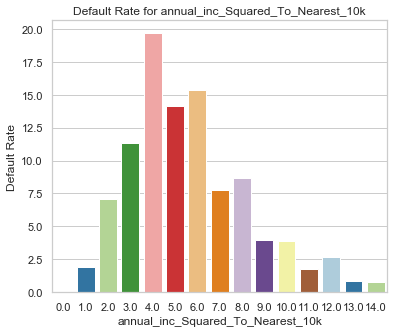

In [97]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'annual_inc_Squared_To_Nearest_10k')

**Observations**

✓ Majority of the borrowers falls within income range between 10000 to 60000$

✓ We see a pattern with annual income, default rate starts to increase gradually with the increase in income till 40000 $, then it decreases gradually

**With an annual income of 40000$ default_rate is maximum of over 20%**

### Variable : Purpose

In [98]:
loanDfUnivariate.purpose.value_counts()

debt_consolidation    16626
credit_card            4655
other                  3651
home_improvement       2460
major_purchase         2023
small_business         1516
car                    1446
wedding                 884
medical                 636
moving                  548
vacation                364
house                   322
educational             312
renewable_energy         94
Name: purpose, dtype: int64

In [99]:
loanDfUnivariate.purpose.describe()

count                  35537
unique                    14
top       debt_consolidation
freq                   16626
Name: purpose, dtype: object

Text(0.5, 1.0, 'Purpose vs Purpose count by loans status')

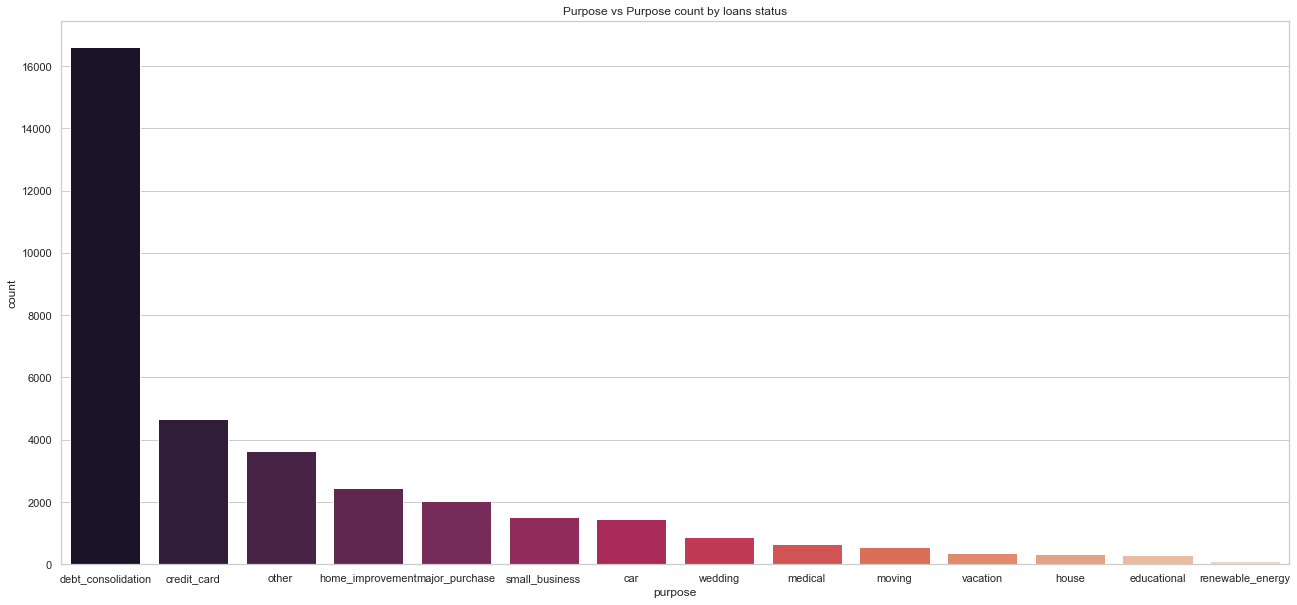

In [100]:
plt.figure(figsize=(22, 10))
sns.countplot(loanDfUnivariate.purpose, order = loanDfUnivariate.purpose.value_counts().index, palette="rocket")
plt.title('Purpose vs Purpose count by loans status')

**Default rate for charged off loans by purpose**

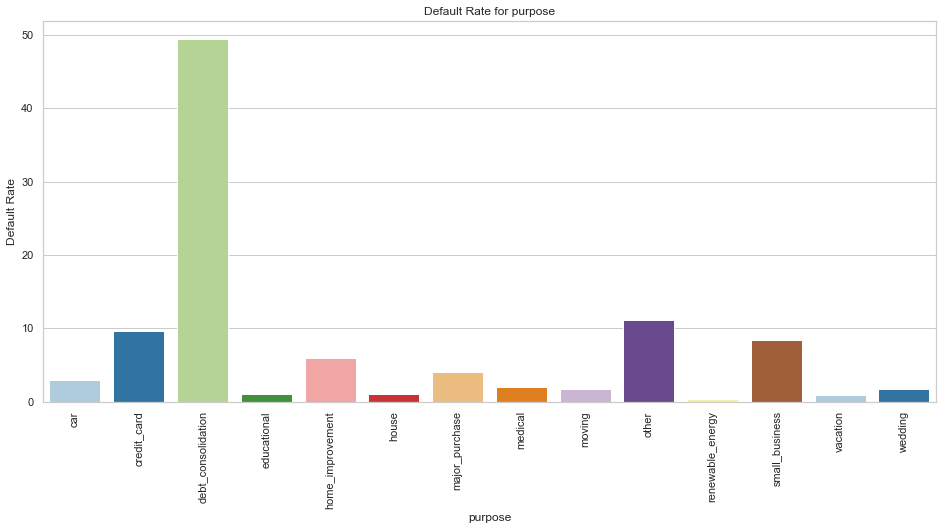

In [101]:
default_rate_plot_for_more_bins(loanDfUnivariateLoanAmntChargedOff,'purpose')

Let's now see the counts of it

Text(0.5, 1.0, 'Purpose Type vs Purpose count for charged off loans')

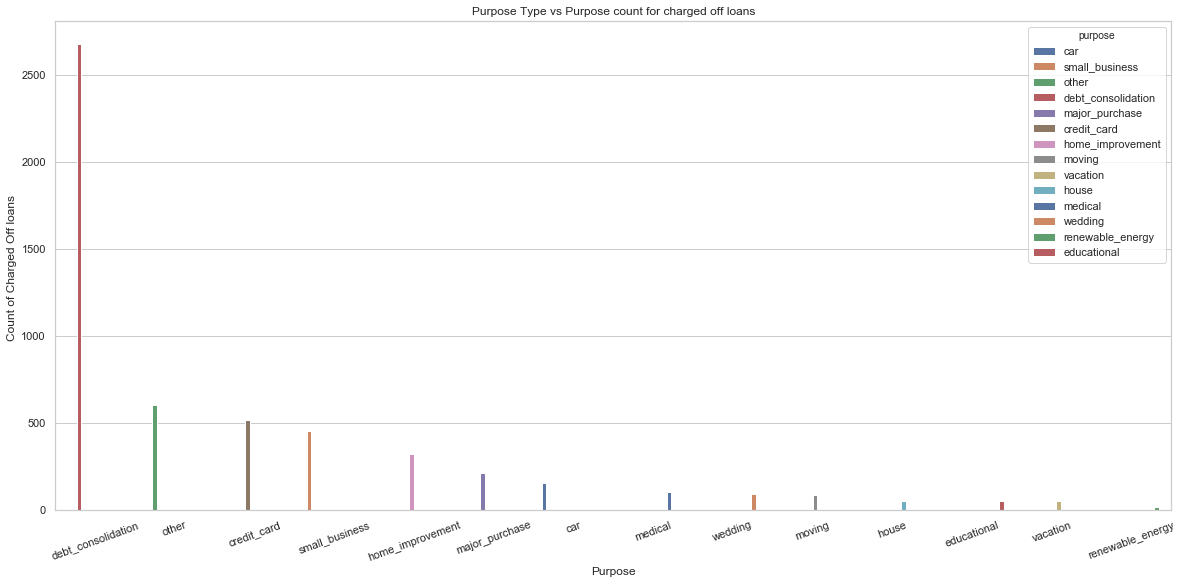

In [102]:
plt.figure(figsize=(20, 9))
g = sns.countplot(x=loanDfUnivariateLoanAmntChargedOff.purpose,hue=loanDfUnivariateLoanAmntChargedOff.purpose, 
                   order = loanDfUnivariateLoanAmntChargedOff.purpose.value_counts().index, 
                   palette="deep")
g.set_xlabel('Purpose',fontsize=12)
g.set_ylabel('Count of Charged Off loans ',fontsize=12)
plt.xticks(rotation=20)
plt.title('Purpose Type vs Purpose count for charged off loans')

In [103]:
loanDfUnivariateLoanAmntChargedOff.groupby('purpose').purpose.count().sort_values(ascending=False)

purpose
debt_consolidation    2677
other                  605
credit_card            519
small_business         454
home_improvement       322
major_purchase         217
car                    159
medical                104
wedding                 92
moving                  90
house                   55
educational             54
vacation                52
renewable_energy        18
Name: purpose, dtype: int64

**Observations**

✓ Loans are taken mostly for **debt_consolidation** purpose for both paid_off and charged_off types

✓ For Charged_Off type nearly **50%** of the loans defaulted for debt_consolidation purpose

### Variable : total_pymnt

In [104]:
loanDfUnivariate.total_pymnt.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count    35537
mean     10771
std       7318
min          0
5%        1790
10%       2788
25%       5308
50%       9089
75%      14777
90%      21440
95%      25590
99%      31674
max      40385
Name: total_pymnt, dtype: int64

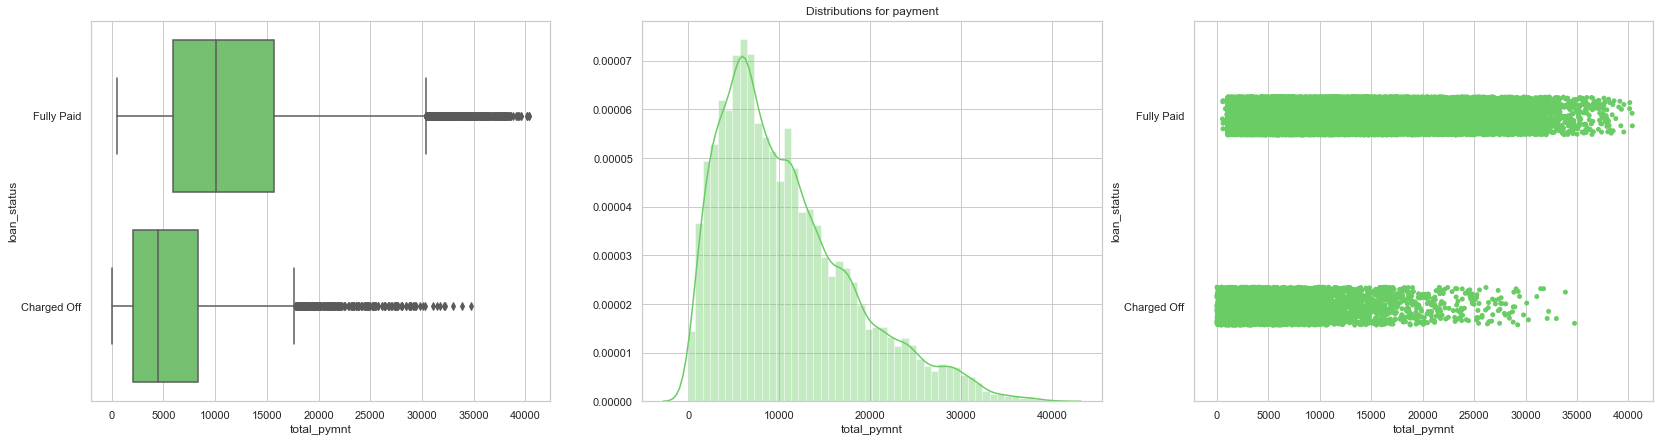

In [105]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='total_pymnt', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.total_pymnt, color='g')
plt.title('Distributions for payment')
plt.subplot(1,3,3)
sns.stripplot(x='total_pymnt', y='loan_status', data=loanDfUnivariate,color='g')

**Outlier treatment**
Some outliers are present in the data, let's handle them

Based on the distribution plot we see there are outliers after 95 percentile, let's remove all the records with total_paymnt greater than 95 percentile i.e, 29352

In [106]:
loanDfUnivariate  = loanDfUnivariate.loc[(loanDfUnivariate['total_pymnt'] <= 23882),:]

In [107]:
loanDfUnivariate.total_pymnt.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count    33117
mean      9491
std       5710
min          0
5%        1715
10%       2667
25%       5019
50%       8483
75%      13358
90%      17994
95%      20465
99%      23208
max      23880
Name: total_pymnt, dtype: int64

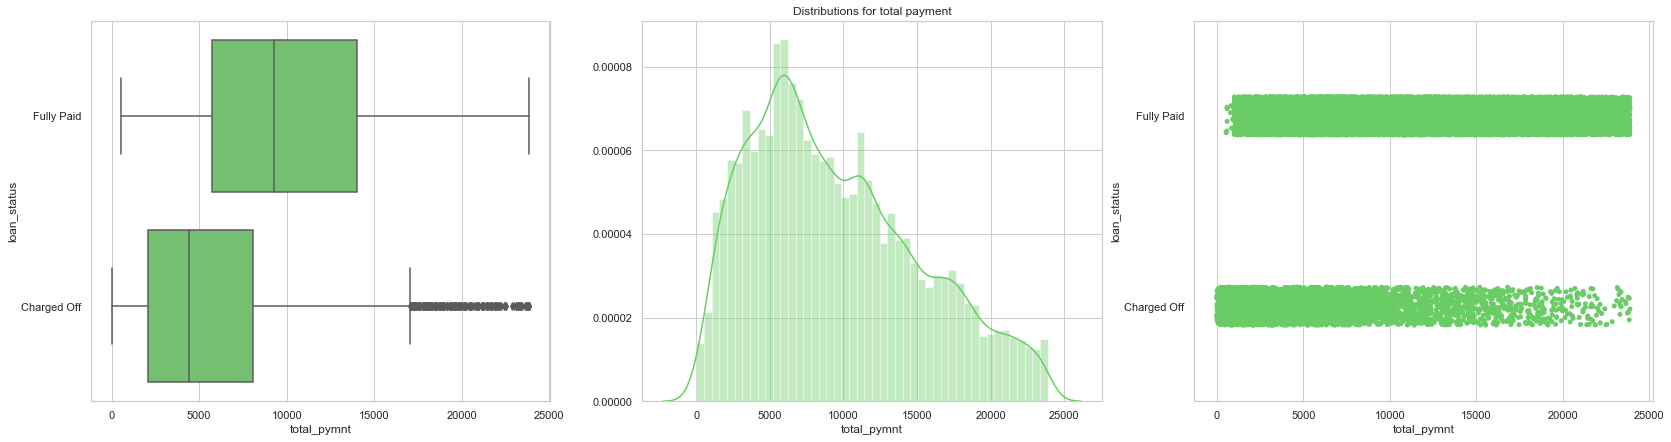

In [108]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='total_pymnt', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.total_pymnt, color='g')
plt.title('Distributions for total payment')
plt.subplot(1,3,3)
sns.stripplot(x='total_pymnt', y='loan_status', data=loanDfUnivariate,color='g')

In [109]:
loanDfUnivariate.total_pymnt.value_counts()

11196.569430    25
11784.232230    16
10956.775960    16
0.000000        15
5478.387981     14
                ..
9705.873832      1
13640.797930     1
6862.963275      1
18785.359300     1
6245.922962      1
Name: total_pymnt, Length: 31420, dtype: int64

**Derived metrics**

Let's create new bin for total payment and divide it by 1000

In [110]:
loanDfUnivariate['total_pymnt_by_1000'] = round(loanDfUnivariate['total_pymnt']/1000).astype('int64')
loanDfUnivariateLoanAmntChargedOff['total_pymnt_by_1000'] = round(loanDfUnivariateLoanAmntChargedOff['total_pymnt']/1000).astype('int64')

In [111]:
loanDfUnivariateLoanAmntChargedOff.total_pymnt_by_1000.value_counts()

1     668
2     663
3     586
4     458
5     448
6     387
7     289
0     232
8     227
9     217
10    194
11    126
12    122
13    114
14     94
15     92
16     79
17     60
19     47
18     42
20     35
21     29
24     28
22     26
25     25
23     20
27     15
29     14
28     14
26     10
30     10
32     10
35      4
42      4
31      4
33      4
37      3
36      3
34      3
43      2
40      2
39      2
45      2
38      2
52      1
41      1
Name: total_pymnt_by_1000, dtype: int64

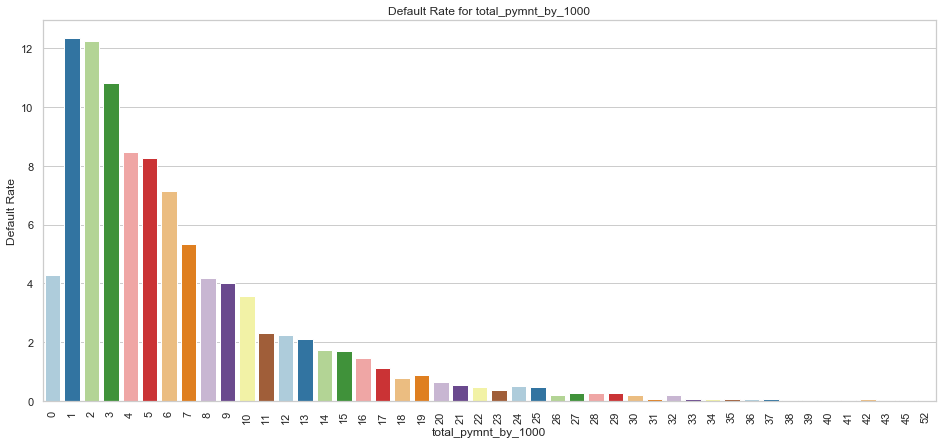

In [112]:
default_rate_plot_for_more_bins(loanDfUnivariateLoanAmntChargedOff,'total_pymnt_by_1000')

Let's now compare the total_investment amount between two loan_status types

Text(0.5, 1.0, 'Total payment vs payment amount, loan status wise')

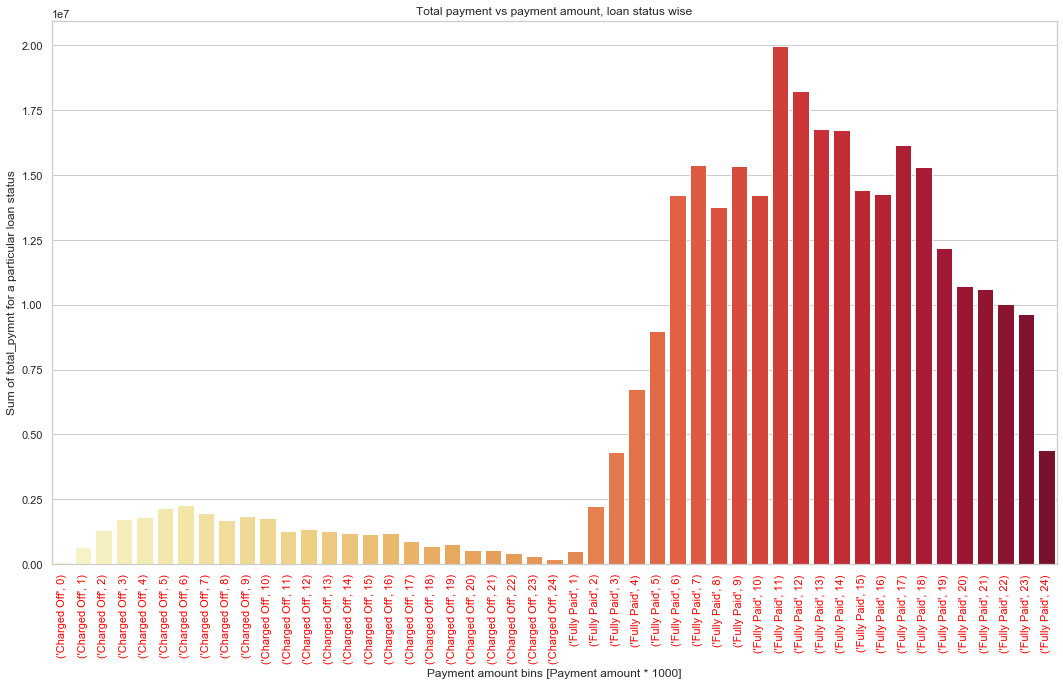

In [113]:
plt.figure(figsize=(18, 10))
g = sns.barplot(x= loanDfUnivariate.groupby(['loan_status','total_pymnt_by_1000']).total_pymnt.sum().index,
                y= loanDfUnivariate.groupby(['loan_status','total_pymnt_by_1000']).total_pymnt.sum(), 
                   palette="YlOrRd")
g.set_xlabel('Payment amount bins [Payment amount * 1000]',fontsize=12)
g.set_ylabel('Sum of total_pymnt for a particular loan status',fontsize=12)
plt.xticks(rotation=90, color='red')
plt.title('Total payment vs payment amount, loan status wise')

In [114]:
loanDfUnivariate.groupby(['loan_status']).total_pymnt_by_1000.mean().astype('int64').sort_values(ascending=False)

loan_status
Fully Paid     10
Charged Off     5
Name: total_pymnt_by_1000, dtype: int64

**Observations**

✓ Default rate is maximum for the total_pymnt range between 1000 to 3000 $ nearly **12%** default rate

✓   That the average total payment made for the charged off loans is around 6000  

### Variable : installment

In [115]:
loanDfUnivariate.installment.value_counts()

311.11    65
180.96    56
311.02    52
150.80    46
372.12    44
          ..
172.55     1
65.82      1
168.82     1
543.00     1
369.84     1
Name: installment, Length: 12993, dtype: int64

**Derived metrics**

Let's create a new bins column installment_rounded_off to hold to one-tenth of the actual installment values

In [116]:
loanDfUnivariate['installment_rounded_off'] = round(loanDfUnivariate['installment']/10).astype('int64')
loanDfUnivariateLoanAmntChargedOff['installment_rounded_off'] = round(loanDfUnivariateLoanAmntChargedOff['installment']/10).astype('int64')

In [117]:
loanDfUnivariate['installment_rounded_off'].value_counts()

16    1244
17    1074
19    1061
20     982
10     932
31     904
15     848
22     829
33     824
25     824
13     822
12     813
26     810
34     777
32     768
21     756
18     750
28     743
23     736
24     732
14     712
27     698
9      695
30     694
11     638
8      633
37     633
35     608
39     605
29     548
7      546
40     535
36     497
38     486
6      484
5      472
41     419
49     380
47     331
50     328
42     307
3      305
46     293
48     282
51     281
52     276
44     272
43     251
4      240
53     226
45     222
66     160
54     159
55     150
56     145
65     132
59     132
57     123
58     118
61     110
62     102
60      99
63      86
64      77
67      71
68      57
69      45
70      29
2       25
71      20
72      19
82      13
87      10
85      10
74       9
86       9
84       9
88       8
73       7
83       7
77       7
81       6
90       6
75       6
80       5
78       5
89       5
76       5
92       2
91       1
93       1

In [118]:
loanDfUnivariate.installment_rounded_off.describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count    33117
mean        27
std         15
min          2
5%           7
10%          9
25%         16
50%         25
75%         36
90%         49
95%         56
99%         67
max         93
Name: installment_rounded_off, dtype: int64

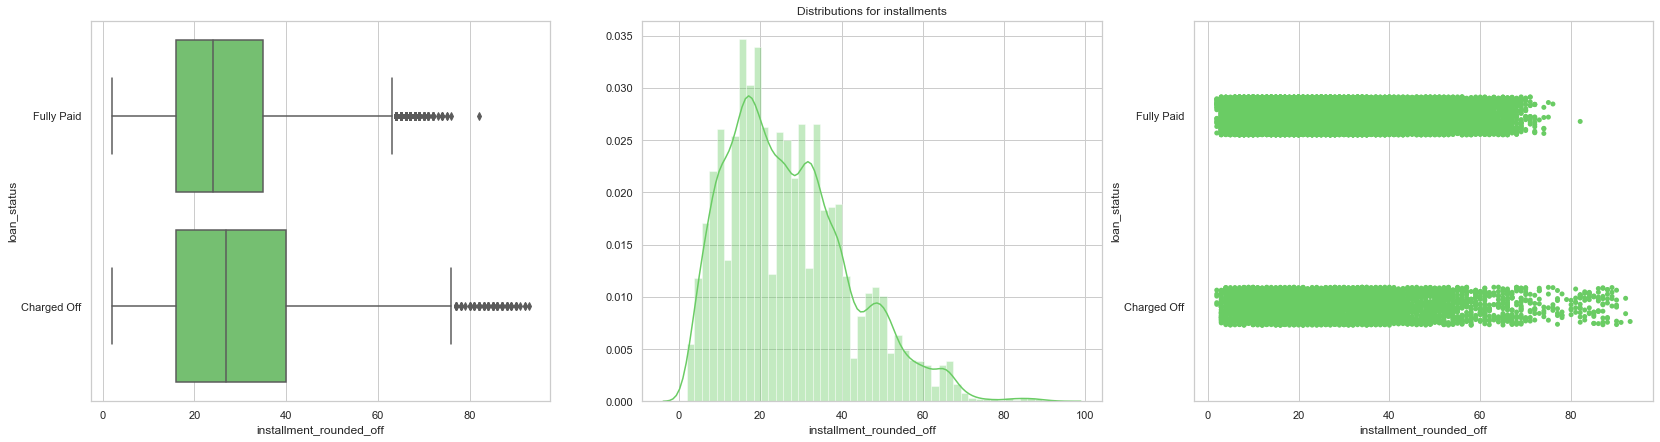

In [119]:
plt.figure(figsize=(28, 7))
plt.subplot(1,3,1)
sns.boxplot(x='installment_rounded_off', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.installment_rounded_off, color='g')
plt.title('Distributions for installments')
plt.subplot(1,3,3)
sns.stripplot(x='installment_rounded_off', y='loan_status', data=loanDfUnivariate,color='g')

**Outliers treatment** - There are certainly outliers, let's get rid of them

In [120]:
loanDfUnivariate  = loanDfUnivariate.loc[(loanDfUnivariate['installment_rounded_off'] <= 81),:]
loanDfUnivariateLoanAmntChargedOff = loanDfUnivariateLoanAmntChargedOff.loc[(loanDfUnivariateLoanAmntChargedOff['installment_rounded_off'] <= 81),:]

Let's see the distribution now

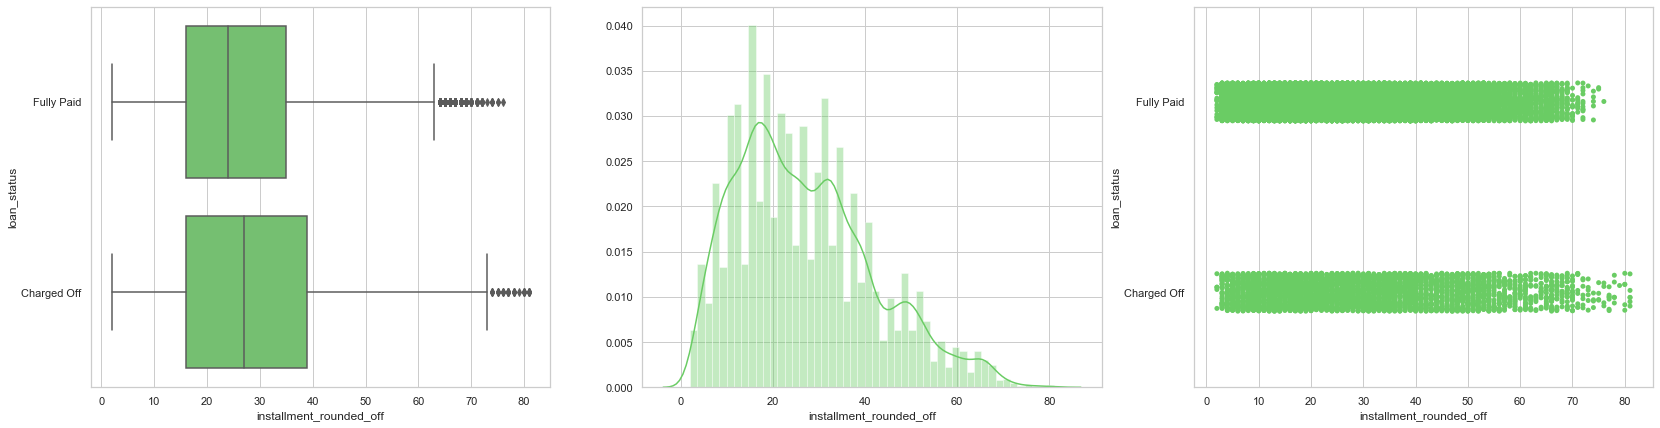

In [121]:
plt.figure(figsize=(28, 7))
plt.title('Distributions for installments')
plt.subplot(1,3,1)
sns.boxplot(x='installment_rounded_off', y='loan_status', data=loanDfUnivariate,color='g')
plt.subplot(1,3,2)
sns.distplot(loanDfUnivariate.installment_rounded_off, color='g')
plt.subplot(1,3,3)
sns.stripplot(x='installment_rounded_off', y='loan_status', data=loanDfUnivariate,color='g')


**Default rate for charged off loans by installments**

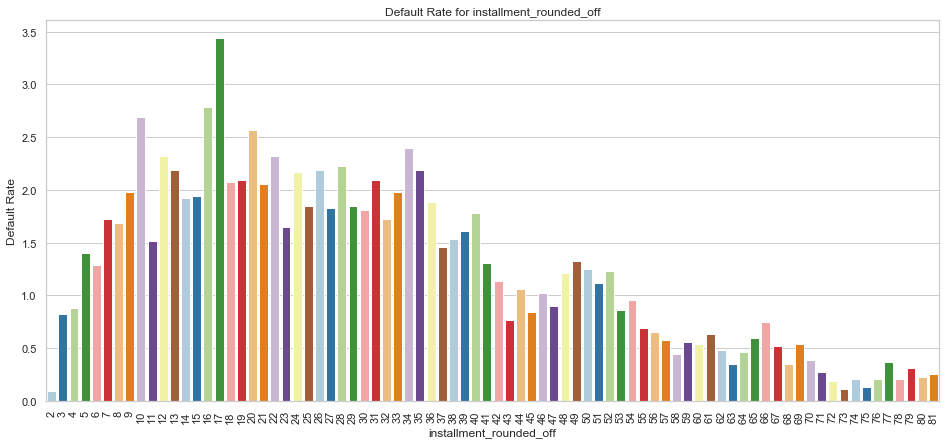

In [122]:
default_rate_plot_for_more_bins(loanDfUnivariateLoanAmntChargedOff,'installment_rounded_off')

Let's now see the installment's pattern irrespective of loan type

Text(0.5, 1.0, 'Sum of installment vs installment amount by loan status')

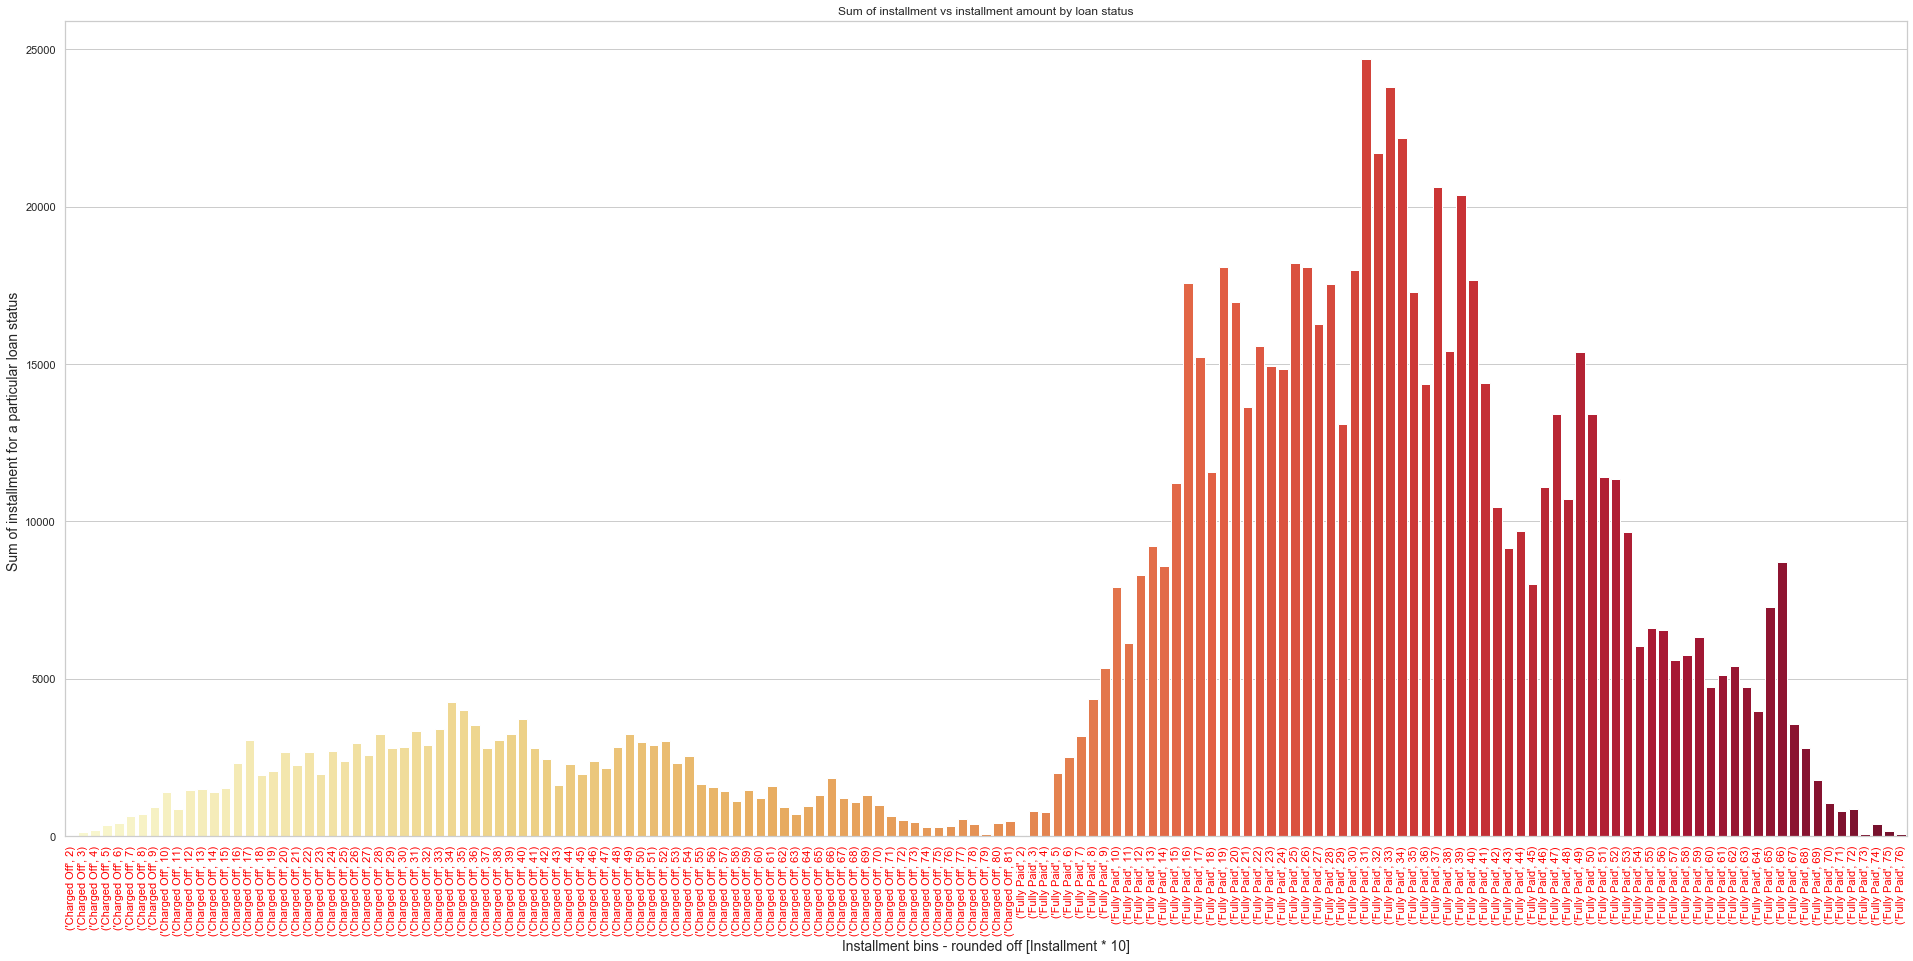

In [123]:
plt.figure(figsize=(33, 15))
g = sns.barplot(x= loanDfUnivariate.groupby(['loan_status','installment_rounded_off']).installment_rounded_off.sum().index,
                y= loanDfUnivariate.groupby(['loan_status','installment_rounded_off']).installment_rounded_off.sum(), 
                   palette="YlOrRd")
g.set_xlabel('Installment bins - rounded off [Installment * 10]',fontsize=14)
g.set_ylabel('Sum of installment for a particular loan status ',fontsize=14)
plt.xticks(rotation=90,color ='red')
plt.title('Sum of installment vs installment amount by loan status')

In [124]:
loanDfUnivariate.groupby(['loan_status','installment_rounded_off']).installment_rounded_off.sum().astype('int64').sort_values(ascending=False)

loan_status  installment_rounded_off
Fully Paid   31                         24676
             33                         23793
             34                         22168
             32                         21696
             37                         20609
             39                         20358
             25                         18200
             26                         18096
             19                         18088
             30                         18000
             40                         17680
             16                         17584
             28                         17556
             35                         17290
             20                         16960
             27                         16281
             22                         15576
             38                         15428
             49                         15386
             17                         15215
             23                         149

From the above analysis we observe :-

✓ **With installment of 170 dollars loans are likely to default the most i.e., by 35%**

✓ Loans are more prone to default at an installment **around 340 dollars**

### Variable : home_ownership

In [125]:
loanDfUnivariate.home_ownership.value_counts()

RENT        16735
MORTGAGE    13553
OWN          2656
OTHER          89
NONE            3
Name: home_ownership, dtype: int64

In [126]:
loanDfUnivariate.home_ownership.describe()

count     33036
unique        5
top        RENT
freq      16735
Name: home_ownership, dtype: object

**Default rate for charged oof loans by home_ownership**

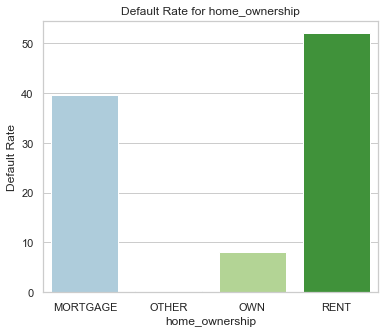

In [127]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'home_ownership')

Let's now see the count pattern for ownership type for charged off loans

Text(0.5, 1.0, 'Charged off loans by home ownership type')

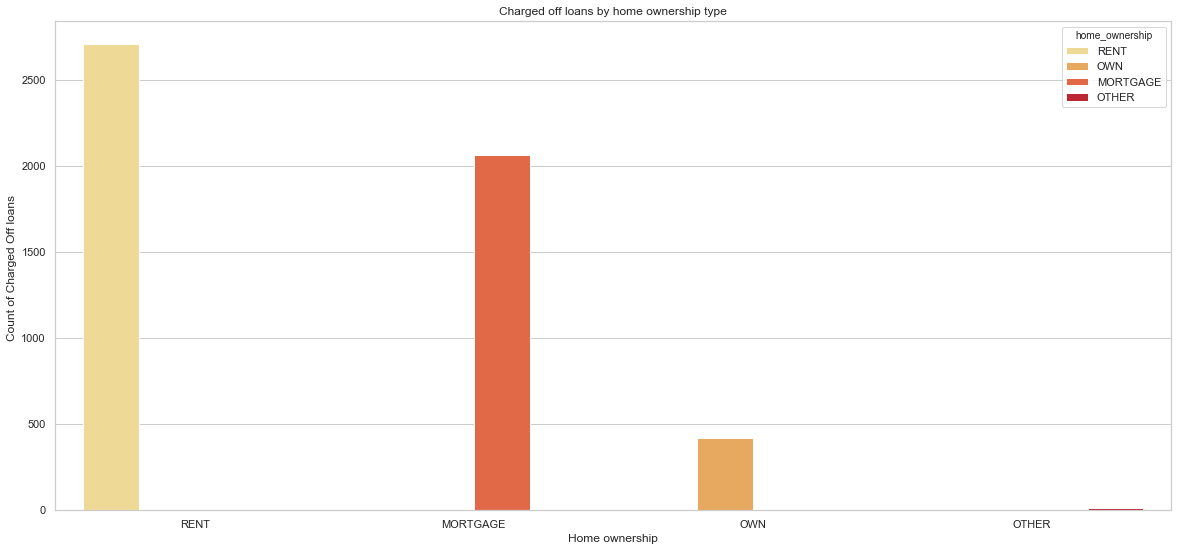

In [128]:
plt.figure(figsize=(20, 9))
g = sns.countplot(x=loanDfUnivariateLoanAmntChargedOff.home_ownership,hue=loanDfUnivariateLoanAmntChargedOff.home_ownership, 
                   order = loanDfUnivariateLoanAmntChargedOff.home_ownership.value_counts().index, 
                   palette="YlOrRd")
g.set_xlabel('Home ownership',fontsize=12)
g.set_ylabel('Count of Charged Off loans ',fontsize=12)
plt.title('Charged off loans by home ownership type')
#plt.xticks(rotation=20)

In [129]:
loanDfUnivariateLoanAmntChargedOff.groupby('home_ownership').loan_status.count().sort_values(ascending=False)

home_ownership
RENT        2706
MORTGAGE    2064
OWN          422
OTHER         16
Name: loan_status, dtype: int64

From the above analysis we observe:-

✓ More than **50%** of the defaulted loans are taken for by borroweres who stays on Rent

✓ Nearly **40%** of the defaulted loans are taken by the borrowers who has kept mortgages

✓ Self house owners has least percentage to default a loan. Default rate is close to **10%**

✓ From the counts analysis we see most of the defaulted loans were taken for **Rent or Mortgage**

### Variable : emp_length

In [130]:
loanDfUnivariate.emp_length.value_counts()

10    6710
0     4051
2     3799
3     3493
4     2899
1     2831
5     2757
6     1844
7     1469
8     1206
9     1016
Name: emp_length, dtype: int64

In [131]:
loanDfUnivariate.emp_length.describe()

count     32075
unique       11
top          10
freq       6710
Name: emp_length, dtype: object

**Default rate for charged off loans by emp_length**

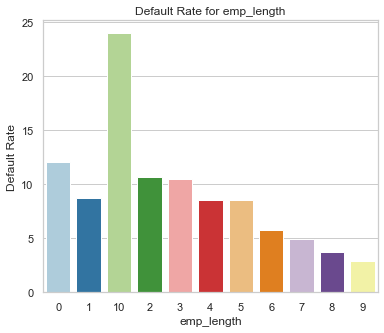

In [132]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'emp_length')

Let's see if the counts analysis gives similar insights

Text(0.5, 1.0, 'Loan Status count by employee length ')

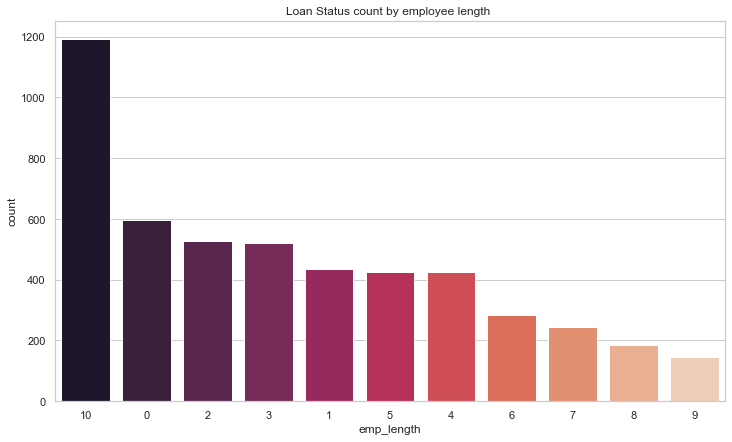

In [133]:
plt.figure(figsize=(12, 7))
sns.countplot(loanDfUnivariateLoanAmntChargedOff.emp_length, order = loanDfUnivariateLoanAmntChargedOff.emp_length.value_counts().index, palette="rocket")
plt.title('Loan Status count by employee length ')

Now let's see the relation of this variable on charged-off loans

In [134]:
loanDfUnivariateLoanAmntChargedOff.groupby('emp_length').loan_status.count().sort_values(ascending=False)

emp_length
10    1193
0      598
2      529
3      520
1      435
5      426
4      424
6      285
7      245
8      186
9      145
Name: loan_status, dtype: int64

**Observations**

✓ More than **30%** of the defaulted loans are taken by borrowers with  **emp_length = 10+ years**

✓ The pattern is exhibited by the countplot as well

✓ Lending Club should strictly monitor the loans applied by borrowers with emp_length > 10

### Variable : verification_status

In [135]:
loanDfUnivariate.verification_status.value_counts()

Not Verified       15912
Source Verified     8716
Verified            8408
Name: verification_status, dtype: int64

In [136]:
loanDfUnivariate.verification_status.describe()

count            33036
unique               3
top       Not Verified
freq             15912
Name: verification_status, dtype: object

**Default rate for charged off loans by verification status**

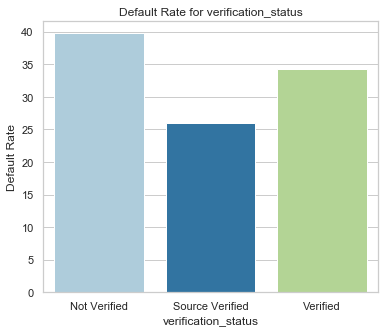

In [137]:
default_rate_plot(loanDfUnivariateLoanAmntChargedOff,'verification_status')

In [138]:
loanDfUnivariateLoanAmntChargedOff.groupby('verification_status').loan_status.count().sort_values(ascending=False)

verification_status
Not Verified       2069
Verified           1787
Source Verified    1352
Name: loan_status, dtype: int64

**Observations**

✓ It is clear that most of the *Not verified* loans were like to default, with a default rate of more than **40%**

Let's see if we can find out some more insights for the above vairables in the bivariate analysis 

# 4. Bivariate Analysis

In [139]:
loanDf = loanDfUnivariate

The objective is to analyse the defaulted loan, so creating a categorical derived metric variable named "is_default".

In [140]:
loanDf['is_default']=["Yes" if x =='Charged Off' else "No" for x in loanDf['loan_status']] 

In [141]:
loanDf.shape

(33036, 35)

In [142]:
loanDf.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599       5000         5000           4975.0    36     10.65   
1    1314167       2500         2500           2500.0    60     15.27   
2    1313524       2400         2400           2400.0    36     15.96   
3    1277178      10000        10000          10000.0    36     13.49   
5    1311441       5000         5000           5000.0    36      7.90   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN         10   
1        59.83     C        C4                 Ryder          0   
2        84.33     C        C5                   NaN         10   
3       339.31     C        C1   AIR RESOURCES BOARD         10   
5       156.46     A        A4  Veolia Transportaton          3   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose                                  title zip_code addr_state  \
0     credit_card                               Computer    860xx         AZ   
1             car                                   bike    309xx         GA   
2  small_business                   real estate business    606xx         IL   
3           other                               personel    917xx         CA   
5         wedding  My wedding loan I promise to pay back    852xx         AZ   

     dti  total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0  27.65          9   5863.155187          5833.84          5000.00   
1   1.00          4   1008.710000          1008.71           456.46   
2   8.72         10   3005.666844          3005.67          2400.00   
3  20.00         37  12231.890000         12231.89         10000.00   
5  11.20         12   5632.210000          5632.21          5000.00   

   total_rec_int  last_pymnt_amnt  issue_dt_Yr  issue_dt_Mth  \
0         863.16           171.62         2011            12   
1         435.17           119.66         2011            12   
2         605.67           649.91         2011            12   
3        2214.92           357.48         2011            12   
5         632.21           161.03         2011            12   

   loan_amnt_to_funded_amnt_inv_ratio  int_rate_SquaredOff  \
0                               0.995                 11.0   
1                               1.000                 15.0   
2                               1.000                 16.0   
3                               1.000                 13.0   
5                               1.000                  8.0   

   annual_inc_Squared_To_Nearest_10k  total_pymnt_by_1000  \
0                                2.0                    6   
1                                3.0                    1   
2                                1.0                    3   
3                                5.0                   12   
5                                4.0                    6   

   installment_rounded_off is_default  
0                       16         No  
1                        6        Yes  
2                        8         No  
3                       34         No  
5                       16         No

In [143]:
loanDf.drop('member_id', inplace= True, axis=1)

In [144]:
loanDf.shape

(33036, 34)

In [145]:
loanDf.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade             emp_title emp_length home_ownership  annual_inc  \
0        B2                   NaN         10           RENT     24000.0   
1        C4                 Ryder          0           RENT     30000.0   
2        C5                   NaN         10           RENT     12252.0   
3        C1   AIR RESOURCES BOARD         10           RENT     49200.0   
5        A4  Veolia Transportaton          3           RENT     36000.0   

  verification_status    issue_d  loan_status         purpose  \
0            Verified 2011-12-01   Fully Paid     credit_card   
1     Source Verified 2011-12-01  Charged Off             car   
2        Not Verified 2011-12-01   Fully Paid  small_business   
3     Source Verified 2011-12-01   Fully Paid           other   
5     Source Verified 2011-12-01   Fully Paid         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0          9   5863.155187          5833.84          5000.00         863.16   
1          4   1008.710000          1008.71           456.46         435.17   
2         10   3005.666844          3005.67          2400.00         605.67   
3         37  12231.890000         12231.89         10000.00        2214.92   
5         12   5632.210000          5632.21          5000.00         632.21   

   last_pymnt_amnt  issue_dt_Yr  issue_dt_Mth  \
0           171.62         2011            12   
1           119.66         2011            12   
2           649.91         2011            12   
3           357.48         2011            12   
5           161.03         2011            12   

   loan_amnt_to_funded_amnt_inv_ratio  int_rate_SquaredOff  \
0                               0.995                 11.0   
1                               1.000                 15.0   
2                               1.000                 16.0   
3                               1.000                 13.0   
5                               1.000                  8.0   

   annual_inc_Squared_To_Nearest_10k  total_pymnt_by_1000  \
0                                2.0                    6   
1                                3.0                    1   
2                                1.0                    3   
3                                5.0                   12   
5                                4.0                    6   

   installment_rounded_off is_default  
0                       16         No  
1                        6        Yes  
2                        8         No  
3                       34         No  
5                       16         No

In [146]:
# Checking the categorical variables
loanDf_cat=loanDf.select_dtypes(include=object)
loanDf_cat.nunique().sort_values(ascending=True)

loan_status                2
is_default                 2
verification_status        3
home_ownership             5
grade                      7
emp_length                11
purpose                   14
sub_grade                 35
addr_state                50
zip_code                 815
title                  17051
emp_title              24546
dtype: int64

**Issue Date Year vs funded_amnt_inv** 

Text(0.5, 1.0, 'Count of funded_amnt_inv issued through the years')

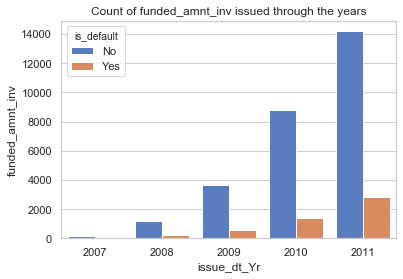

In [147]:
sns.barplot(x='issue_dt_Yr', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Count of funded_amnt_inv issued through the years')

**Observation:** *The count of loan issued by investors through the years are increasing. The default loan count is also increasing through the years as well.*

**Term vs funded_amnt_inv vs Interest Rate**

Text(0.5, 1.0, 'Bar Plot of term vs int_rate count')

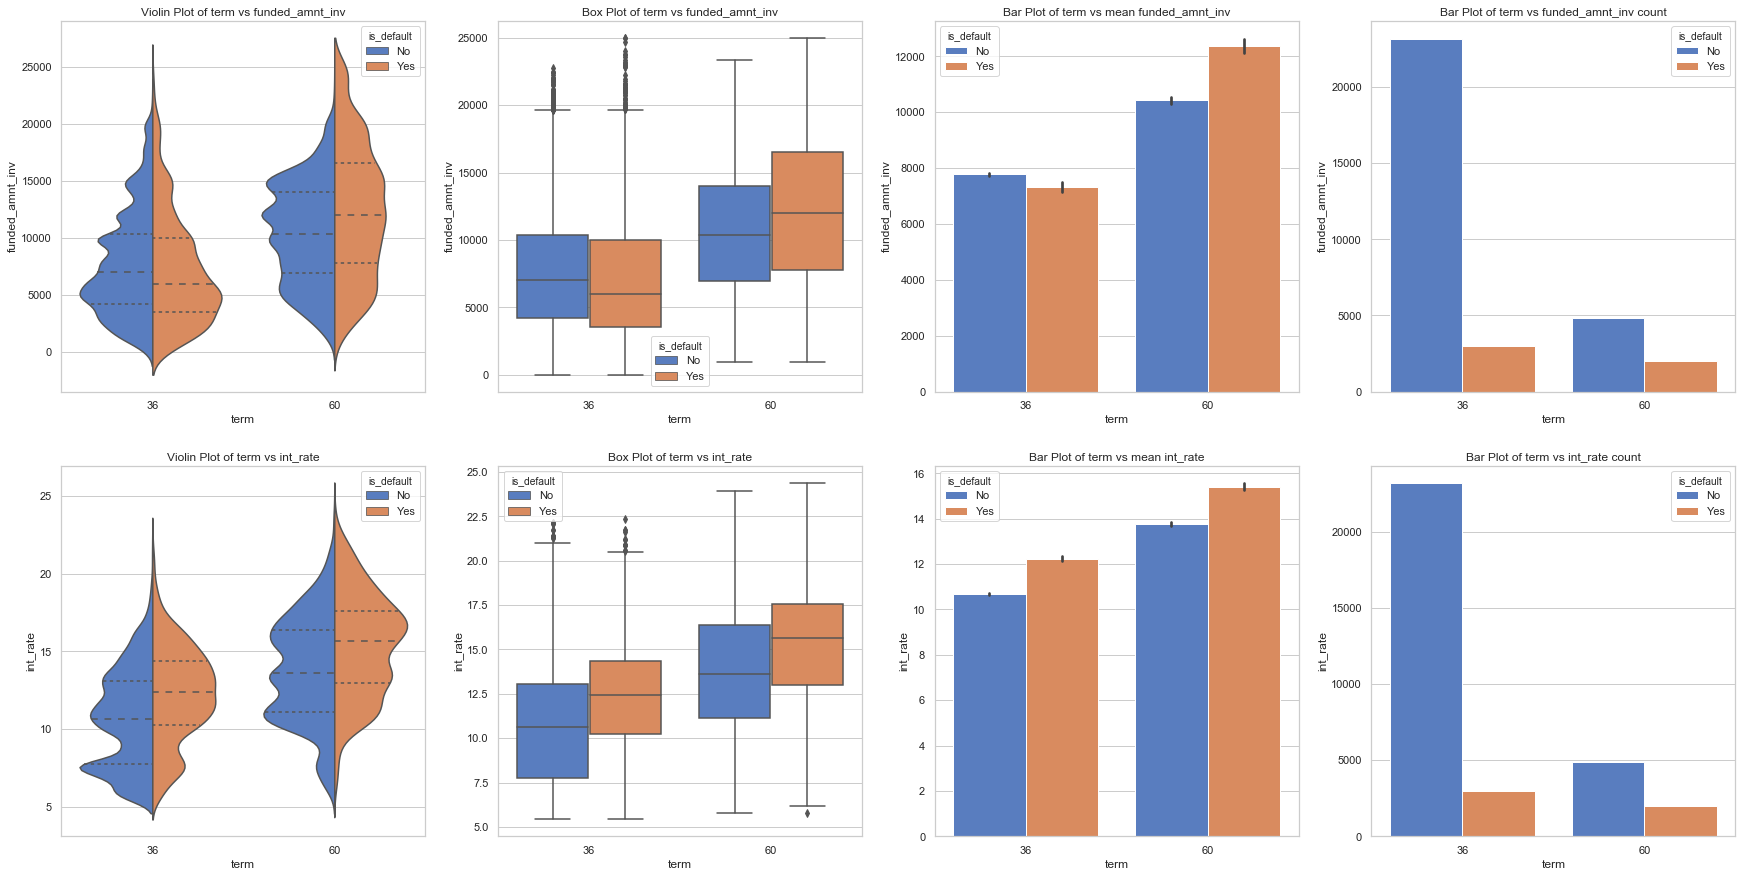

In [148]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.violinplot(x='term',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title("Violin Plot of term vs funded_amnt_inv")
plt.subplot(242)
sns.boxplot(x='term',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title("Box Plot of term vs funded_amnt_inv")
plt.subplot(243)
sns.barplot(x='term', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title("Bar Plot of term vs mean funded_amnt_inv")
plt.subplot(244)
sns.barplot(x='term', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title("Bar Plot of term vs funded_amnt_inv count")
################################################################################################
plt.subplot(245)
sns.violinplot(x='term',y='int_rate',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title("Violin Plot of term vs int_rate")
plt.subplot(246)
sns.boxplot(x='term',y='int_rate', hue='is_default',data=loanDf)
plt.title("Box Plot of term vs int_rate")
plt.subplot(247)
sns.barplot(x='term', y='int_rate', hue='is_default', data=loanDf, estimator=np.mean)
plt.title("Bar Plot of term vs mean int_rate")
plt.subplot(248)
sns.barplot(x='term', y='int_rate', hue='is_default', data=loanDf, estimator=np.size)
plt.title("Bar Plot of term vs int_rate count")

**Observation:** *Median loan issued by investor  and interest rate are greater for 60 months term. Most of the loan issued for 36 months. Large loan amount are taken for longer term. Interest rates are dependent on term. Larger amounts taken for higher term are having higher interest rate as well.*

**Verification Status vs funded_amnt_inv**

Text(0.5, 1.0, 'Bar Plot of verification_status vs funded_amnt_inv count')

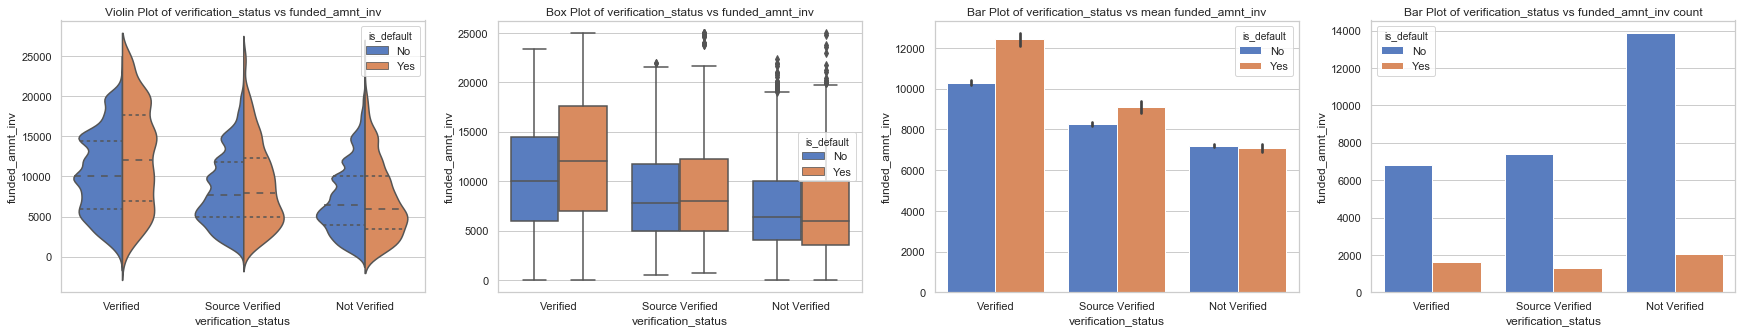

In [149]:
plt.figure(figsize=(30,5))
plt.subplot(141)
sns.violinplot(x='verification_status',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title("Violin Plot of verification_status vs funded_amnt_inv")
plt.subplot(142)
sns.boxplot(x='verification_status',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title("Box Plot of verification_status vs funded_amnt_inv")
plt.subplot(143)
sns.barplot(x='verification_status', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title("Bar Plot of verification_status vs mean funded_amnt_inv")
plt.subplot(144)
sns.barplot(x='verification_status', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title("Bar Plot of verification_status vs funded_amnt_inv count")

**Observation:** *Most of the default are done for the verification status as "Not Verified". From future, to reduce the default of loan, it is advisable to thoroughly verify before giving loan.*


**Home Ownership vs funded_amnt_inv vs Issue Date Year**

Text(0.5, 1.0, 'Bar Plot of Count of Amount Borrowed through the years')

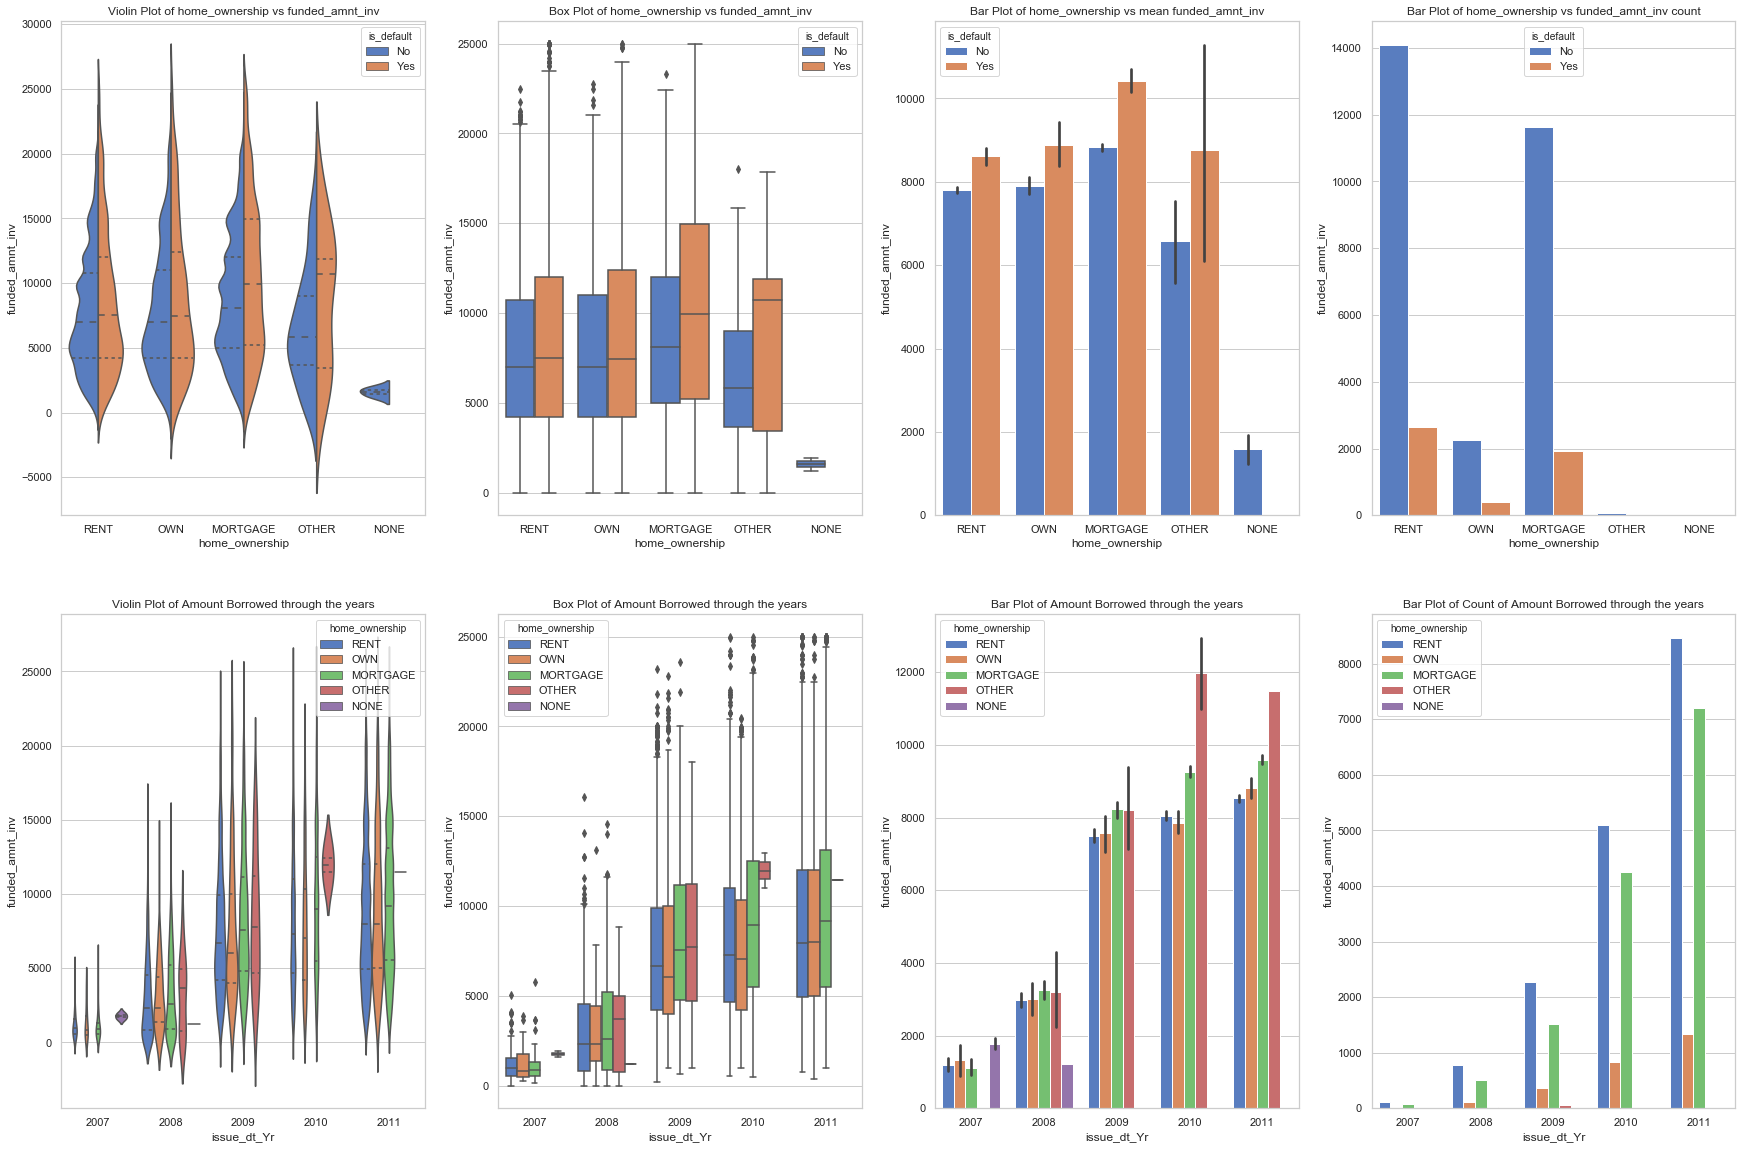

In [150]:
plt.figure(figsize=(30,20))
plt.subplot(241)
sns.violinplot(x='home_ownership',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title("Violin Plot of home_ownership vs funded_amnt_inv")
plt.subplot(242)
sns.boxplot(x='home_ownership',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title("Box Plot of home_ownership vs funded_amnt_inv")
plt.subplot(243)
sns.barplot(x='home_ownership', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title("Bar Plot of home_ownership vs mean funded_amnt_inv")
plt.subplot(244)
sns.barplot(x='home_ownership', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title("Bar Plot of home_ownership vs funded_amnt_inv count")
##################################################################################################
plt.subplot(245)
sns.violinplot(x='issue_dt_Yr',y='funded_amnt_inv',hue='home_ownership',data=loanDf,inner='quart')
plt.title("Violin Plot of Amount Borrowed through the years")
plt.subplot(246)
sns.boxplot(x='issue_dt_Yr',y='funded_amnt_inv', hue='home_ownership',data=loanDf)
plt.title("Box Plot of Amount Borrowed through the years")
plt.subplot(247)
sns.barplot(x='issue_dt_Yr', y='funded_amnt_inv', hue='home_ownership', data=loanDf, estimator=np.mean)
plt.title("Bar Plot of Amount Borrowed through the years")
plt.subplot(248)
sns.barplot(x='issue_dt_Yr', y='funded_amnt_inv', hue='home_ownership', data=loanDf, estimator=np.size)
plt.title("Bar Plot of Count of Amount Borrowed through the years")

**Observation:** *Default of loan mostly done on RENT and MORTGAGE home ownership category. The spread of mortgage is higher than other categories. There is no default for NONE category. Amount of loan borrowed are increasing from 2007 to 2011 gradually.The existence of NONE category has only existence for 2 years (2007 and 2008). There was no existence of OTHER home ownership category in the year 2007. The OTHER category came into existence from 2008 and it gradually increased through the years. From year 2009 onwards, OTHER category is leading based on loan issued. The count of loan borrowed are very high through the years for RENT and MORTGAGE.*

**Grade vs dti vs funded_amnt_inv vs Interest Rate Year vs Issue Date**

Text(0.5, 1.0, 'Count of Interest Rates Gradewise through the years')

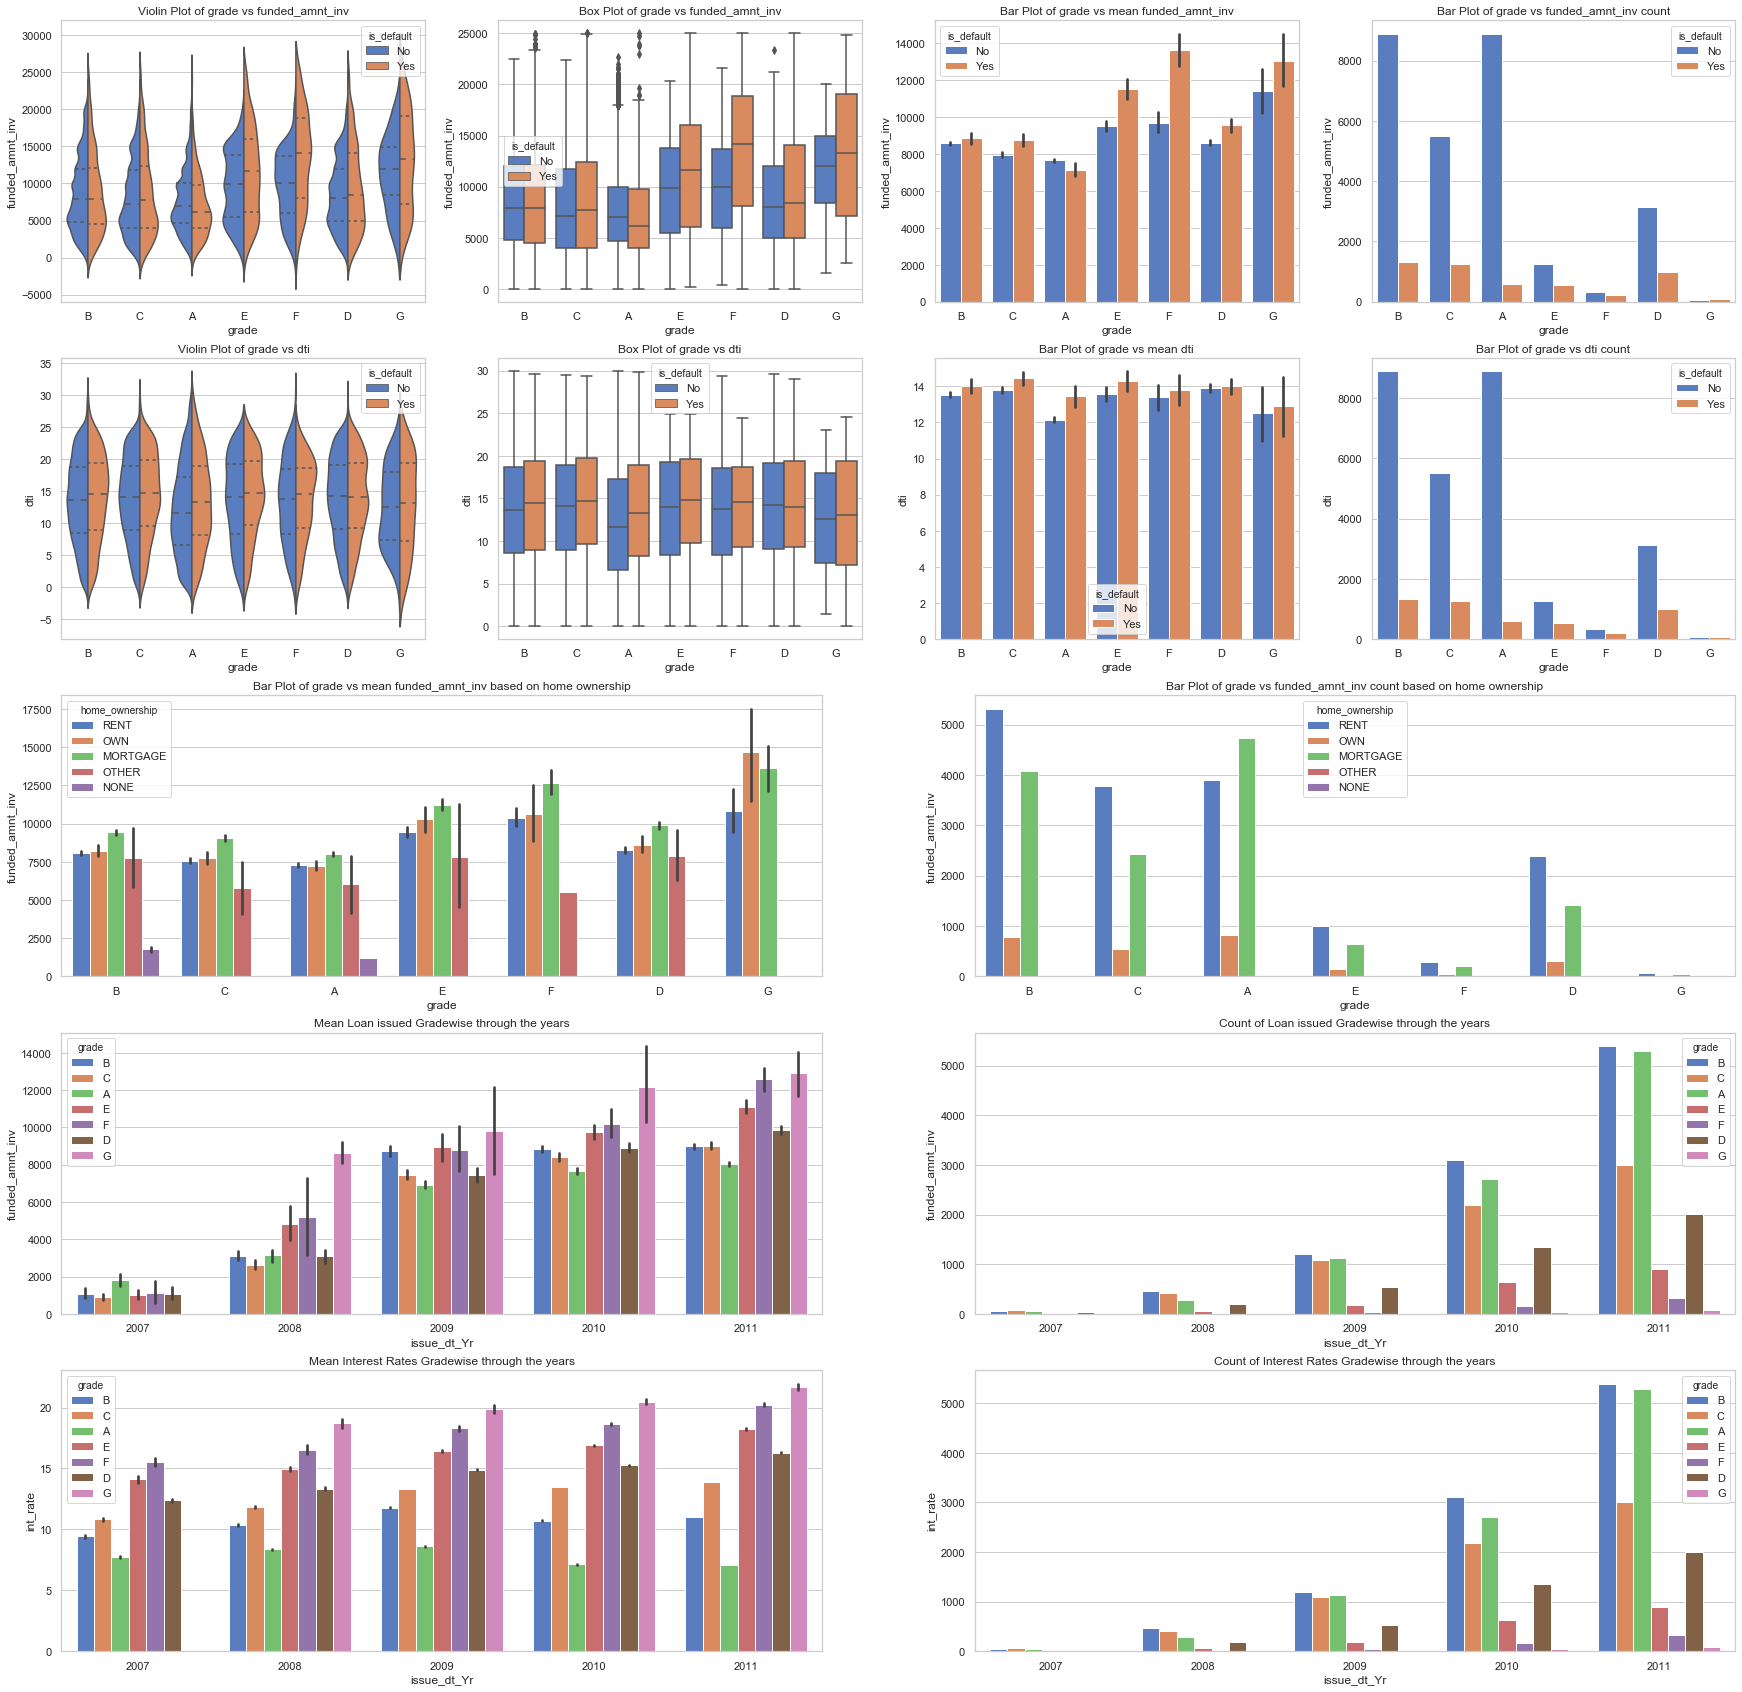

In [151]:
plt.figure(figsize=(30,30))
plt.subplot(541)
sns.violinplot(x='grade',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of grade vs funded_amnt_inv')
plt.subplot(542)
sns.boxplot(x='grade',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title('Box Plot of grade vs funded_amnt_inv')
plt.subplot(543)
sns.barplot(x='grade', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of grade vs mean funded_amnt_inv')
plt.subplot(544)
sns.barplot(x='grade', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Bar Plot of grade vs funded_amnt_inv count')
########################################################################################
plt.subplot(545)
sns.violinplot(x='grade',y='dti',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of grade vs dti')
plt.subplot(546)
sns.boxplot(x='grade',y='dti', hue='is_default',data=loanDf)
plt.title('Box Plot of grade vs dti')
plt.subplot(547)
sns.barplot(x='grade', y='dti', hue='is_default', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of grade vs mean dti')
plt.subplot(548)
sns.barplot(x='grade', y='dti', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Bar Plot of grade vs dti count')
########################################################################################
plt.subplot(525)
sns.barplot(x='grade', y='funded_amnt_inv', hue='home_ownership', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of grade vs mean funded_amnt_inv based on home ownership')
plt.subplot(526)
sns.barplot(x='grade', y='funded_amnt_inv', hue='home_ownership', data=loanDf, estimator=np.size)
plt.title('Bar Plot of grade vs funded_amnt_inv count based on home ownership')
########################################################################################
plt.subplot(527)
sns.barplot(x='issue_dt_Yr', y='funded_amnt_inv', hue='grade', data=loanDf, estimator=np.mean)
plt.title('Mean Loan issued Gradewise through the years')
plt.subplot(528)
sns.barplot(x='issue_dt_Yr', y='funded_amnt_inv', hue='grade', data=loanDf, estimator=np.size)
plt.title('Count of Loan issued Gradewise through the years')
########################################################################################
plt.subplot(529)
sns.barplot(x='issue_dt_Yr', y='int_rate', hue='grade', data=loanDf, estimator=np.mean)
plt.title('Mean Interest Rates Gradewise through the years')
plt.subplot(5,2,10)
sns.barplot(x='issue_dt_Yr', y='int_rate', hue='grade', data=loanDf, estimator=np.size)
plt.title('Count of Interest Rates Gradewise through the years')

**Observation:** *The spread in the lower grades are lesser than higher grades and therefore more likely to give loan to the lower grades. The median loan issued by investor for higher grades are also high which likely to get default. It is interesting to see that higher grades like E, F and G have very low dti. There is an interesting fact comes to the picture that for high grades F and G, having OWN and MORTGAGE category of home ownership receives high loan amount from investors, though its count is very less. Count of Loan issued along with its interest rates gradewise through the years are increasing for lower grades. It is interesting to see that grades B followed by C and D are more likely to default loan.* 


**Sub-Grade vs funded_amnt_inv**

Text(0.5, 1.0, 'Bar Plot of sub_grade vs funded_amnt_inv count')

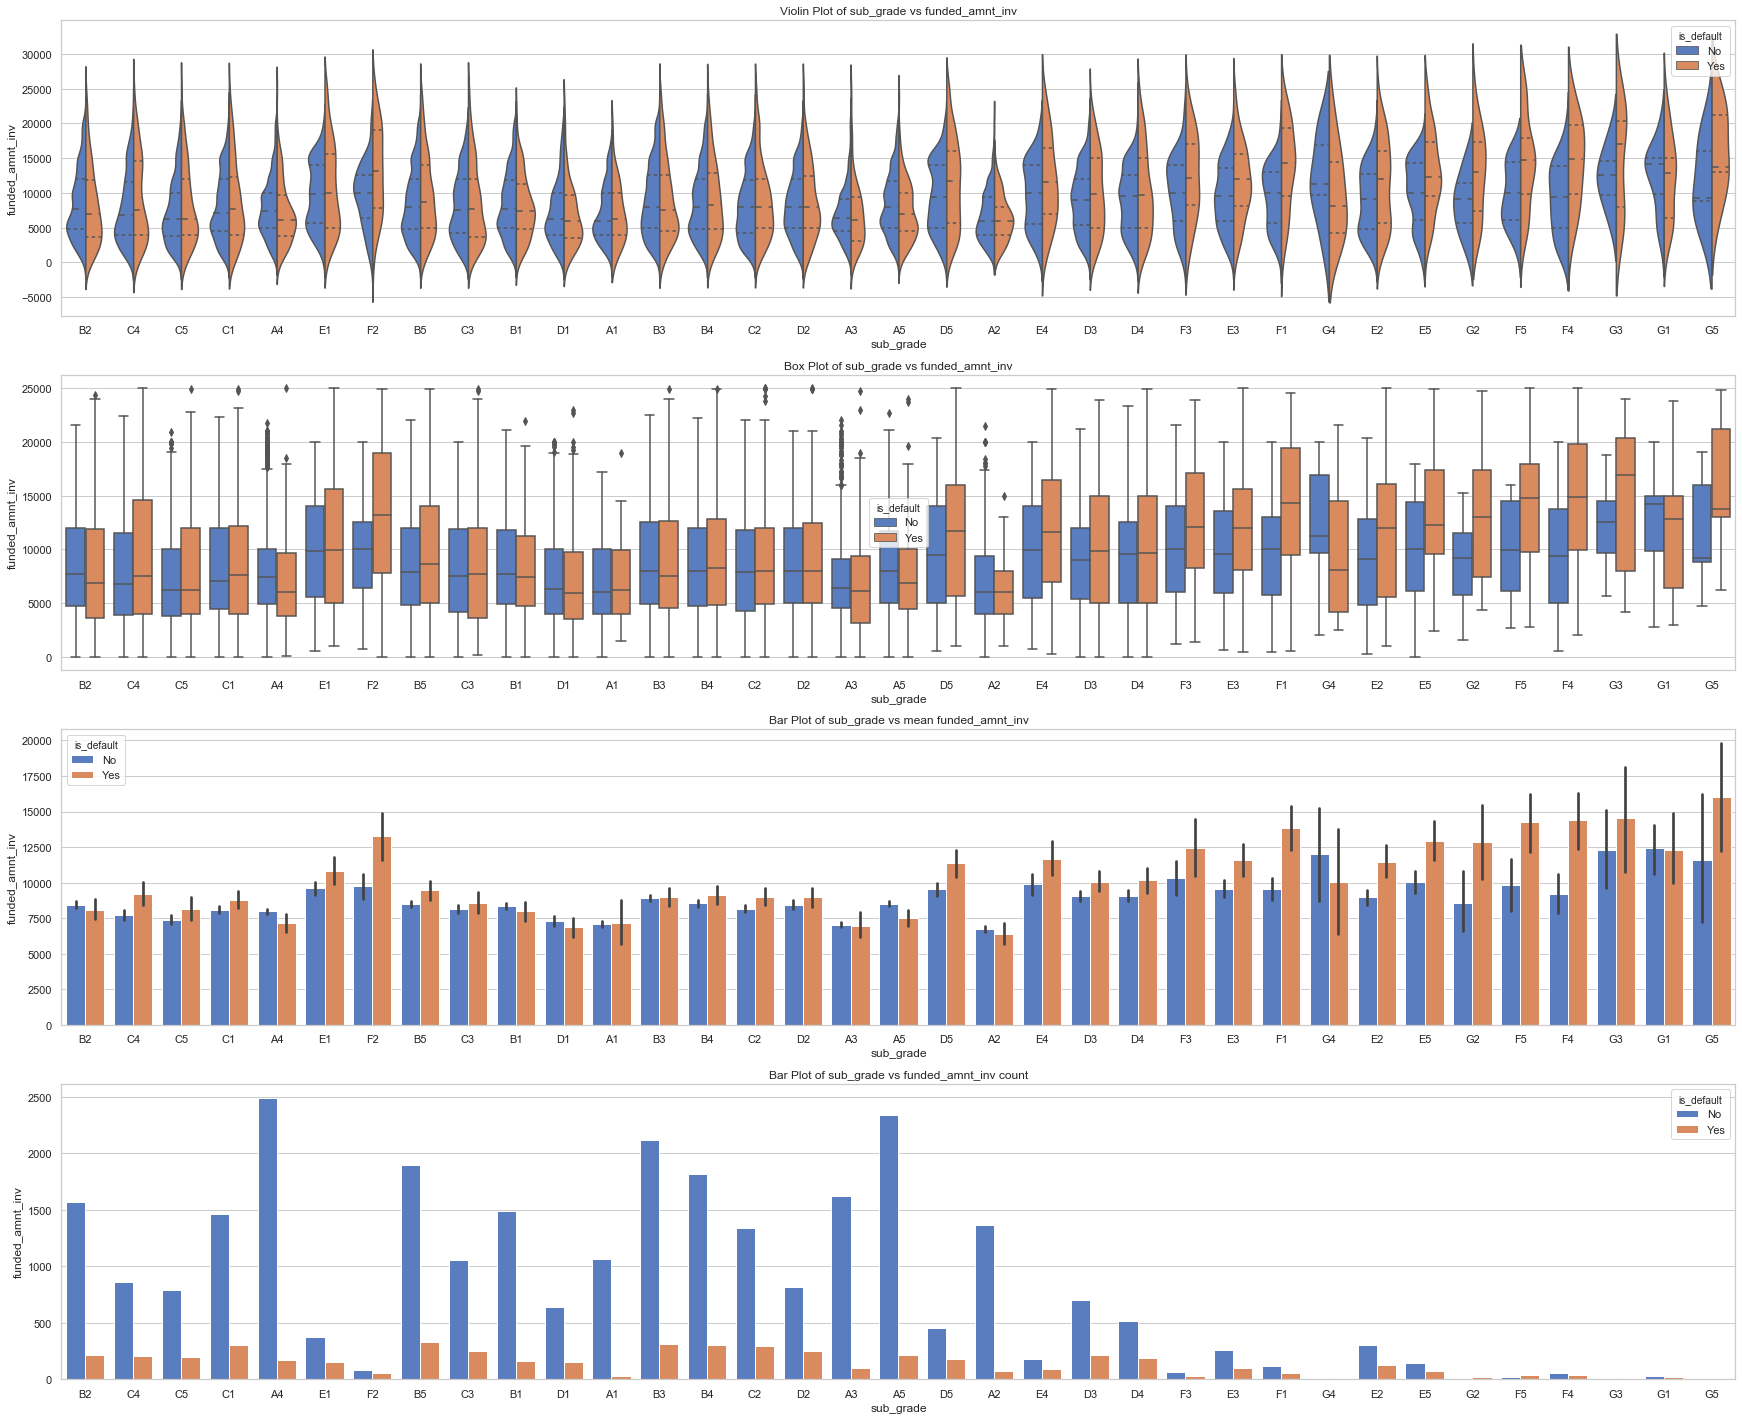

In [152]:
plt.figure(figsize=(30,25))
plt.subplot(411)
sns.violinplot(x='sub_grade',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of sub_grade vs funded_amnt_inv')
plt.subplot(412)
sns.boxplot(x='sub_grade',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title('Box Plot of sub_grade vs funded_amnt_inv')
plt.subplot(413)
sns.barplot(x='sub_grade',y='funded_amnt_inv', hue='is_default',data=loanDf,estimator=np.mean)
plt.title('Bar Plot of sub_grade vs mean funded_amnt_inv')
plt.subplot(414)
sns.barplot(x='sub_grade',y='funded_amnt_inv', hue='is_default',data=loanDf,estimator=np.size)
plt.title('Bar Plot of sub_grade vs funded_amnt_inv count')

**Observation:** *It is more clear by seeing sub-grades that the sub-grades of grade B and C are more likely to default loan. Grade B has highest number of defaulters. Most of the default loans were granted under grade B sub_grade B5.*

**Employee Length vs funded_amnt_inv**

Text(0.5, 1.0, 'Bar Plot of emp_length vs funded_amnt_inv count')

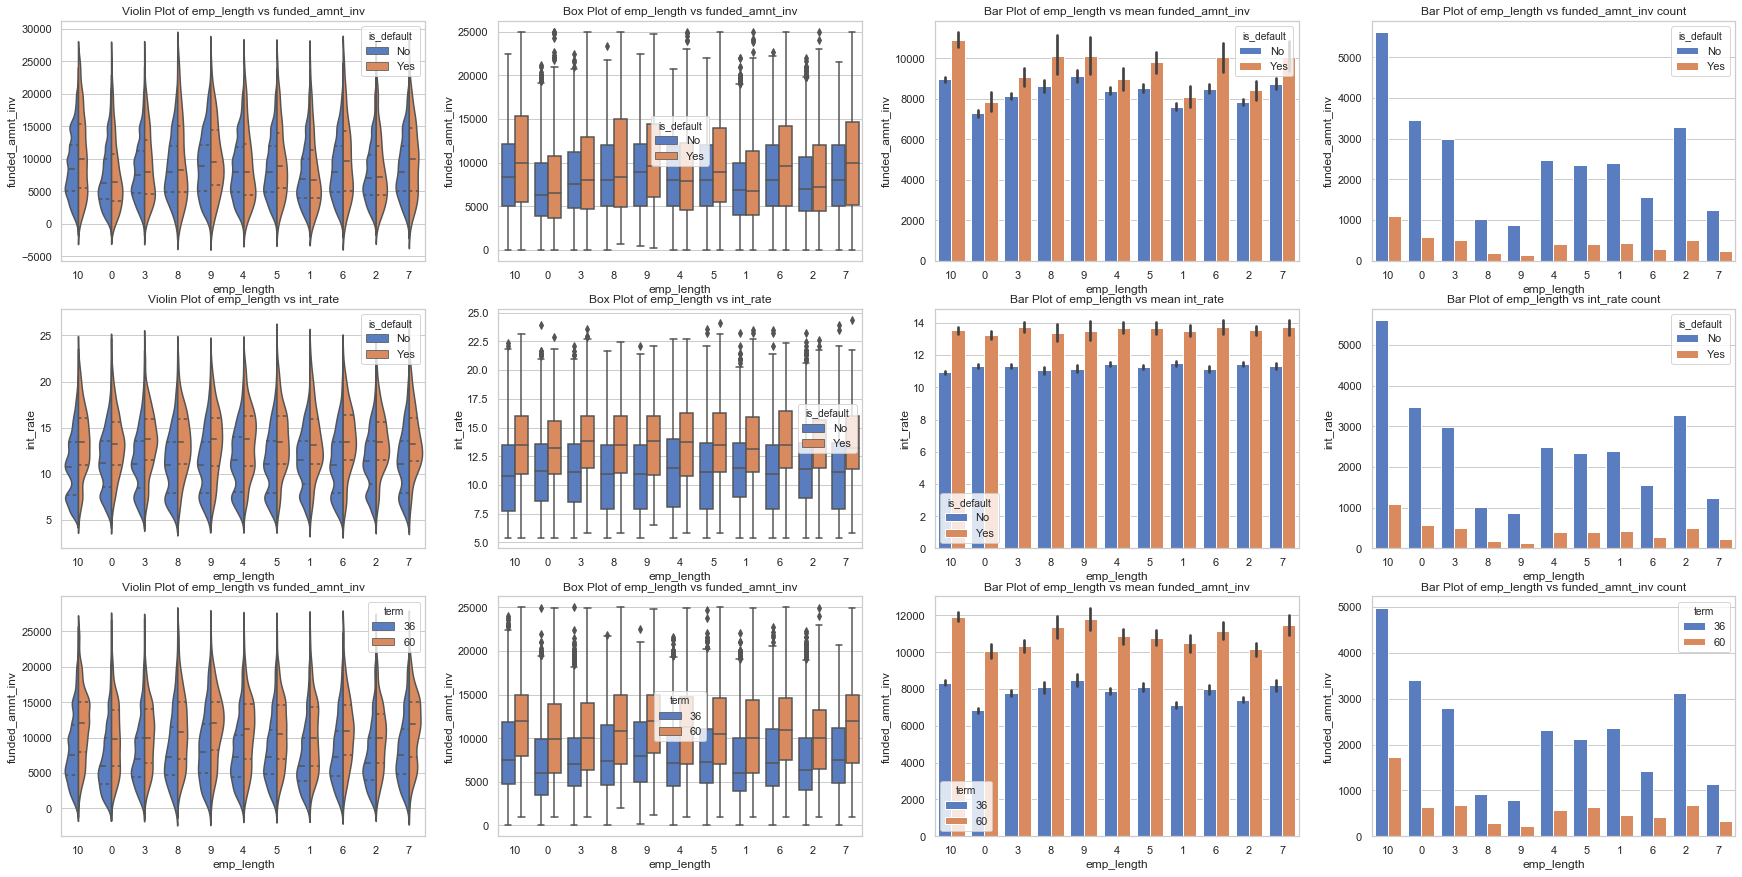

In [153]:
plt.figure(figsize=(30,15))
plt.subplot(341)
sns.violinplot(x='emp_length',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of emp_length vs funded_amnt_inv')
plt.subplot(342)
sns.boxplot(x='emp_length',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title('Box Plot of emp_length vs funded_amnt_inv')
plt.subplot(343)
sns.barplot(x='emp_length', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of emp_length vs mean funded_amnt_inv')
plt.subplot(344)
sns.barplot(x='emp_length', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Bar Plot of emp_length vs funded_amnt_inv count')
#################################################################################################
plt.subplot(345)
sns.violinplot(x='emp_length',y='int_rate',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of emp_length vs int_rate')
plt.subplot(346)
sns.boxplot(x='emp_length',y='int_rate', hue='is_default',data=loanDf)
plt.title('Box Plot of emp_length vs int_rate')
plt.subplot(347)
sns.barplot(x='emp_length', y='int_rate', hue='is_default', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of emp_length vs mean int_rate')
plt.subplot(348)
sns.barplot(x='emp_length', y='int_rate', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Bar Plot of emp_length vs int_rate count')
#################################################################################################
plt.subplot(3,4,9)
sns.violinplot(x='emp_length',y='funded_amnt_inv',hue='term',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of emp_length vs funded_amnt_inv')
plt.subplot(3,4,10)
sns.boxplot(x='emp_length',y='funded_amnt_inv', hue='term',data=loanDf)
plt.title('Box Plot of emp_length vs funded_amnt_inv')
plt.subplot(3,4,11)
sns.barplot(x='emp_length', y='funded_amnt_inv', hue='term', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of emp_length vs mean funded_amnt_inv')
plt.subplot(3,4,12)
sns.barplot(x='emp_length', y='funded_amnt_inv', hue='term', data=loanDf, estimator=np.size)
plt.title('Bar Plot of emp_length vs funded_amnt_inv count')

**Observation:** *10+ experience holder employees has issued maximum loan for 36 months and 60 months term. 10+ experience holder employees are more likely to default loan along with highest interest rate.*

**Purpose vs funded_amnt_inv**

Text(0.5, 1.0, 'Bar Plot of term vs funded_amnt_inv count based on purpose')

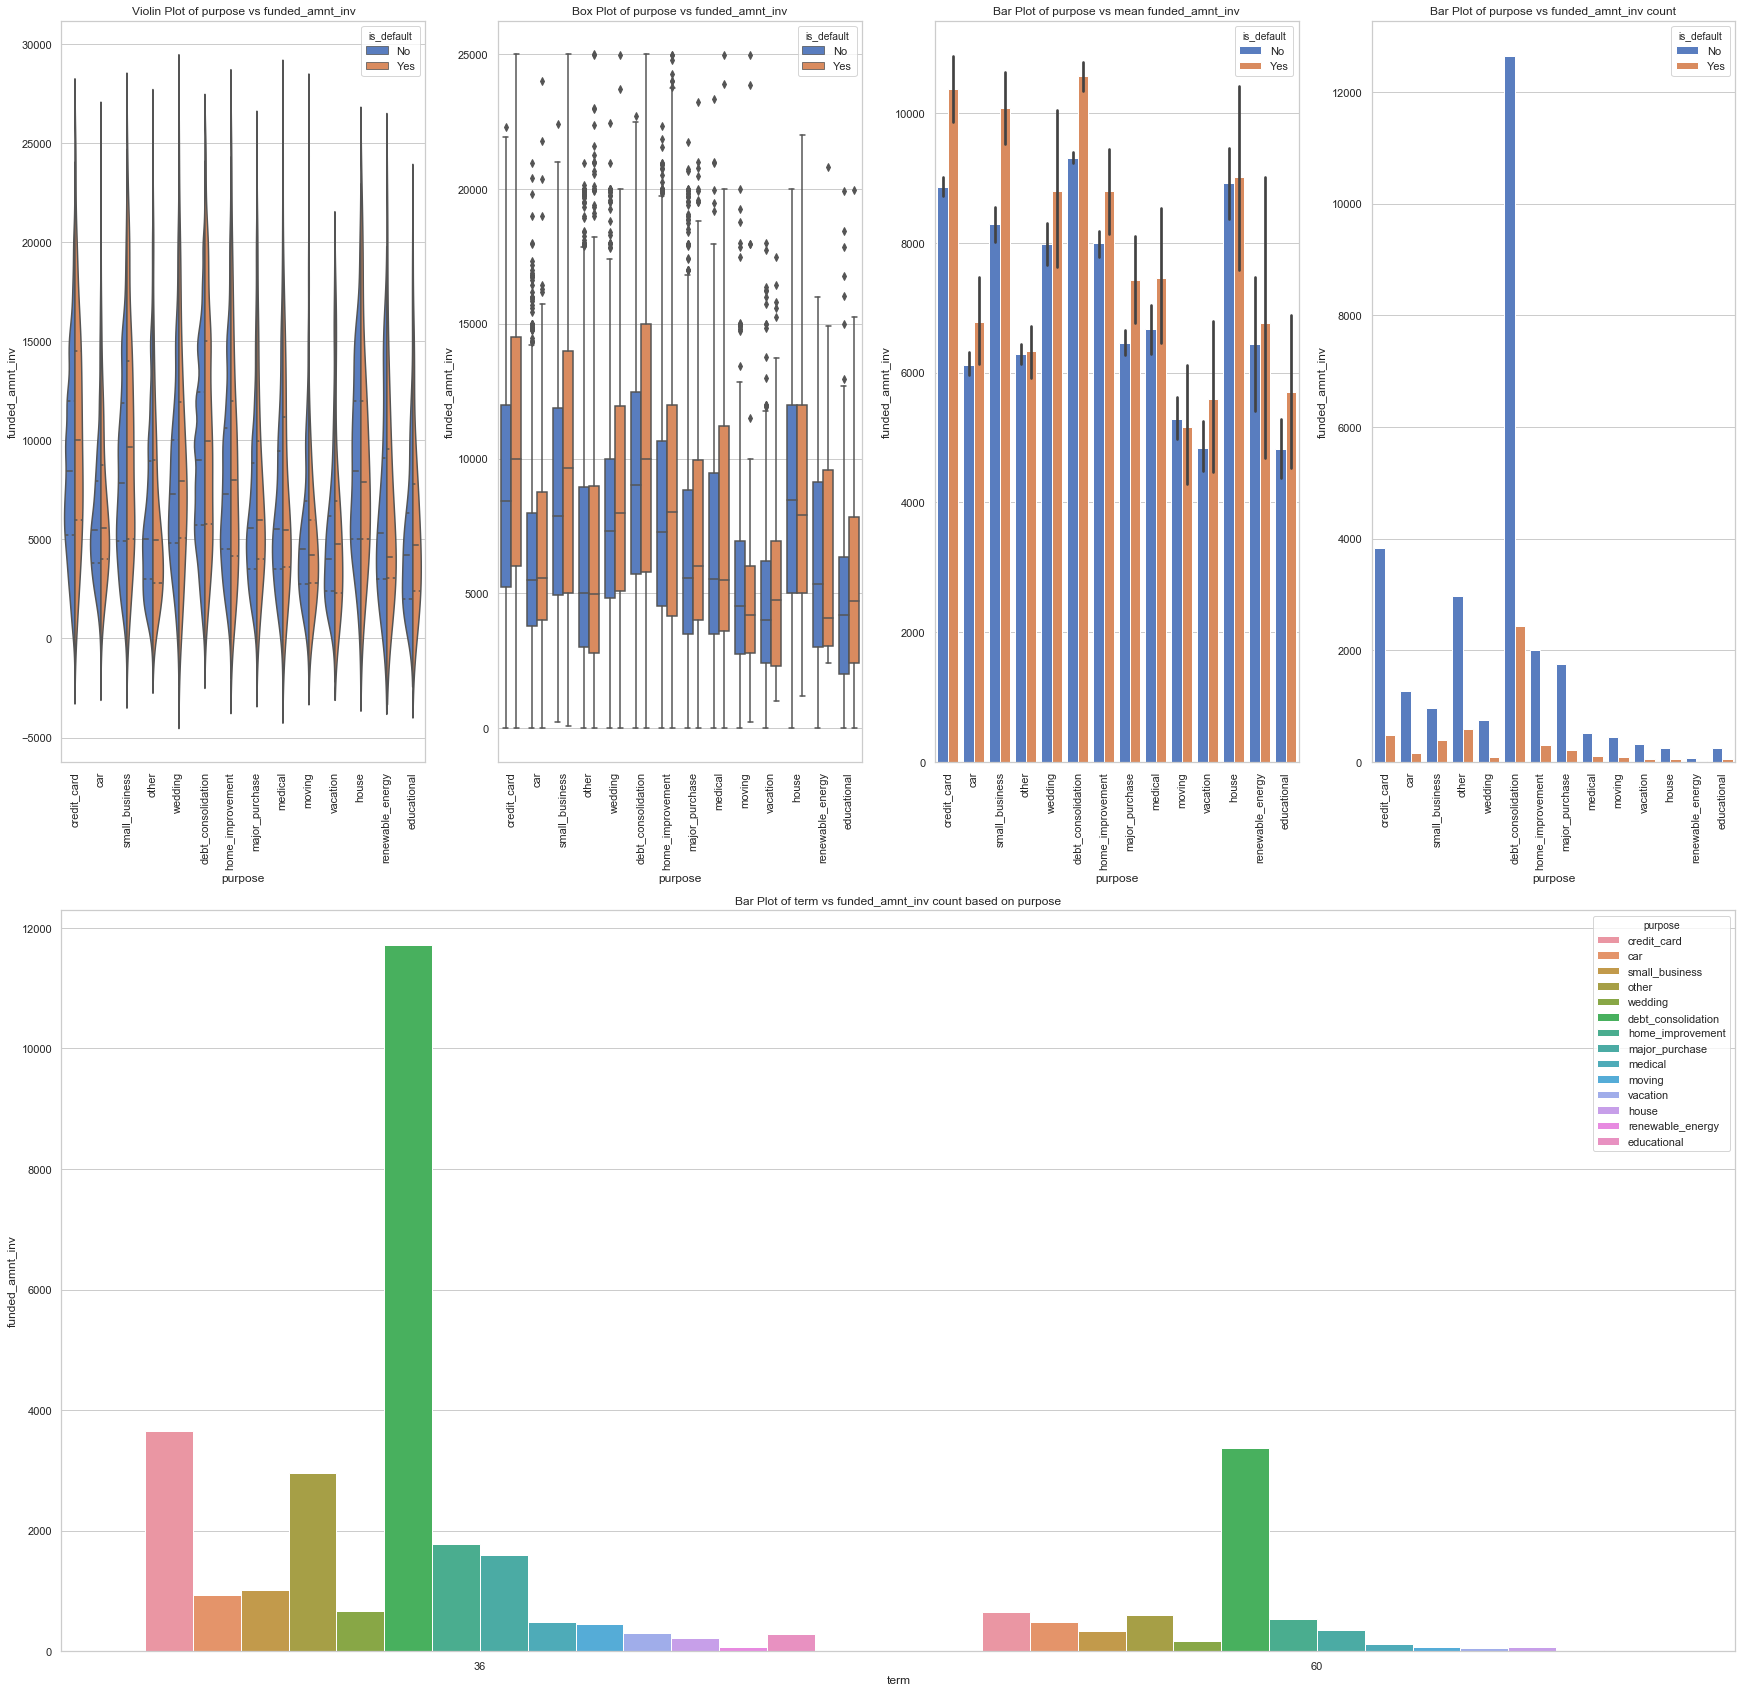

In [154]:
plt.figure(figsize=(30,30))
plt.subplot(241)
sns.violinplot(x='purpose',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of purpose vs funded_amnt_inv')
plt.xticks(rotation=90)
plt.subplot(242)
sns.boxplot(x='purpose',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title('Box Plot of purpose vs funded_amnt_inv')
plt.xticks(rotation=90)
plt.subplot(243)
sns.barplot(x='purpose', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of purpose vs mean funded_amnt_inv')
plt.xticks(rotation=90)
plt.subplot(244)
sns.barplot(x='purpose', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Bar Plot of purpose vs funded_amnt_inv count')
plt.xticks(rotation=90)
################################################################################################
plt.subplot(212)
sns.barplot(x='term', y='funded_amnt_inv', hue='purpose', data=loanDf, estimator=np.size)
plt.title('Bar Plot of term vs funded_amnt_inv count based on purpose')

**Observation:** *Highest number of loans issued for purpose "debt_consolidation" for 36 months and 60 months term. Highest number of loans are defaulted for purpose "debt_consolidation".*

**addr_state vs funded_amnt_inv**

Text(0.5, 1.0, 'Bar Plot of addr_state vs funded_amnt_inv count')

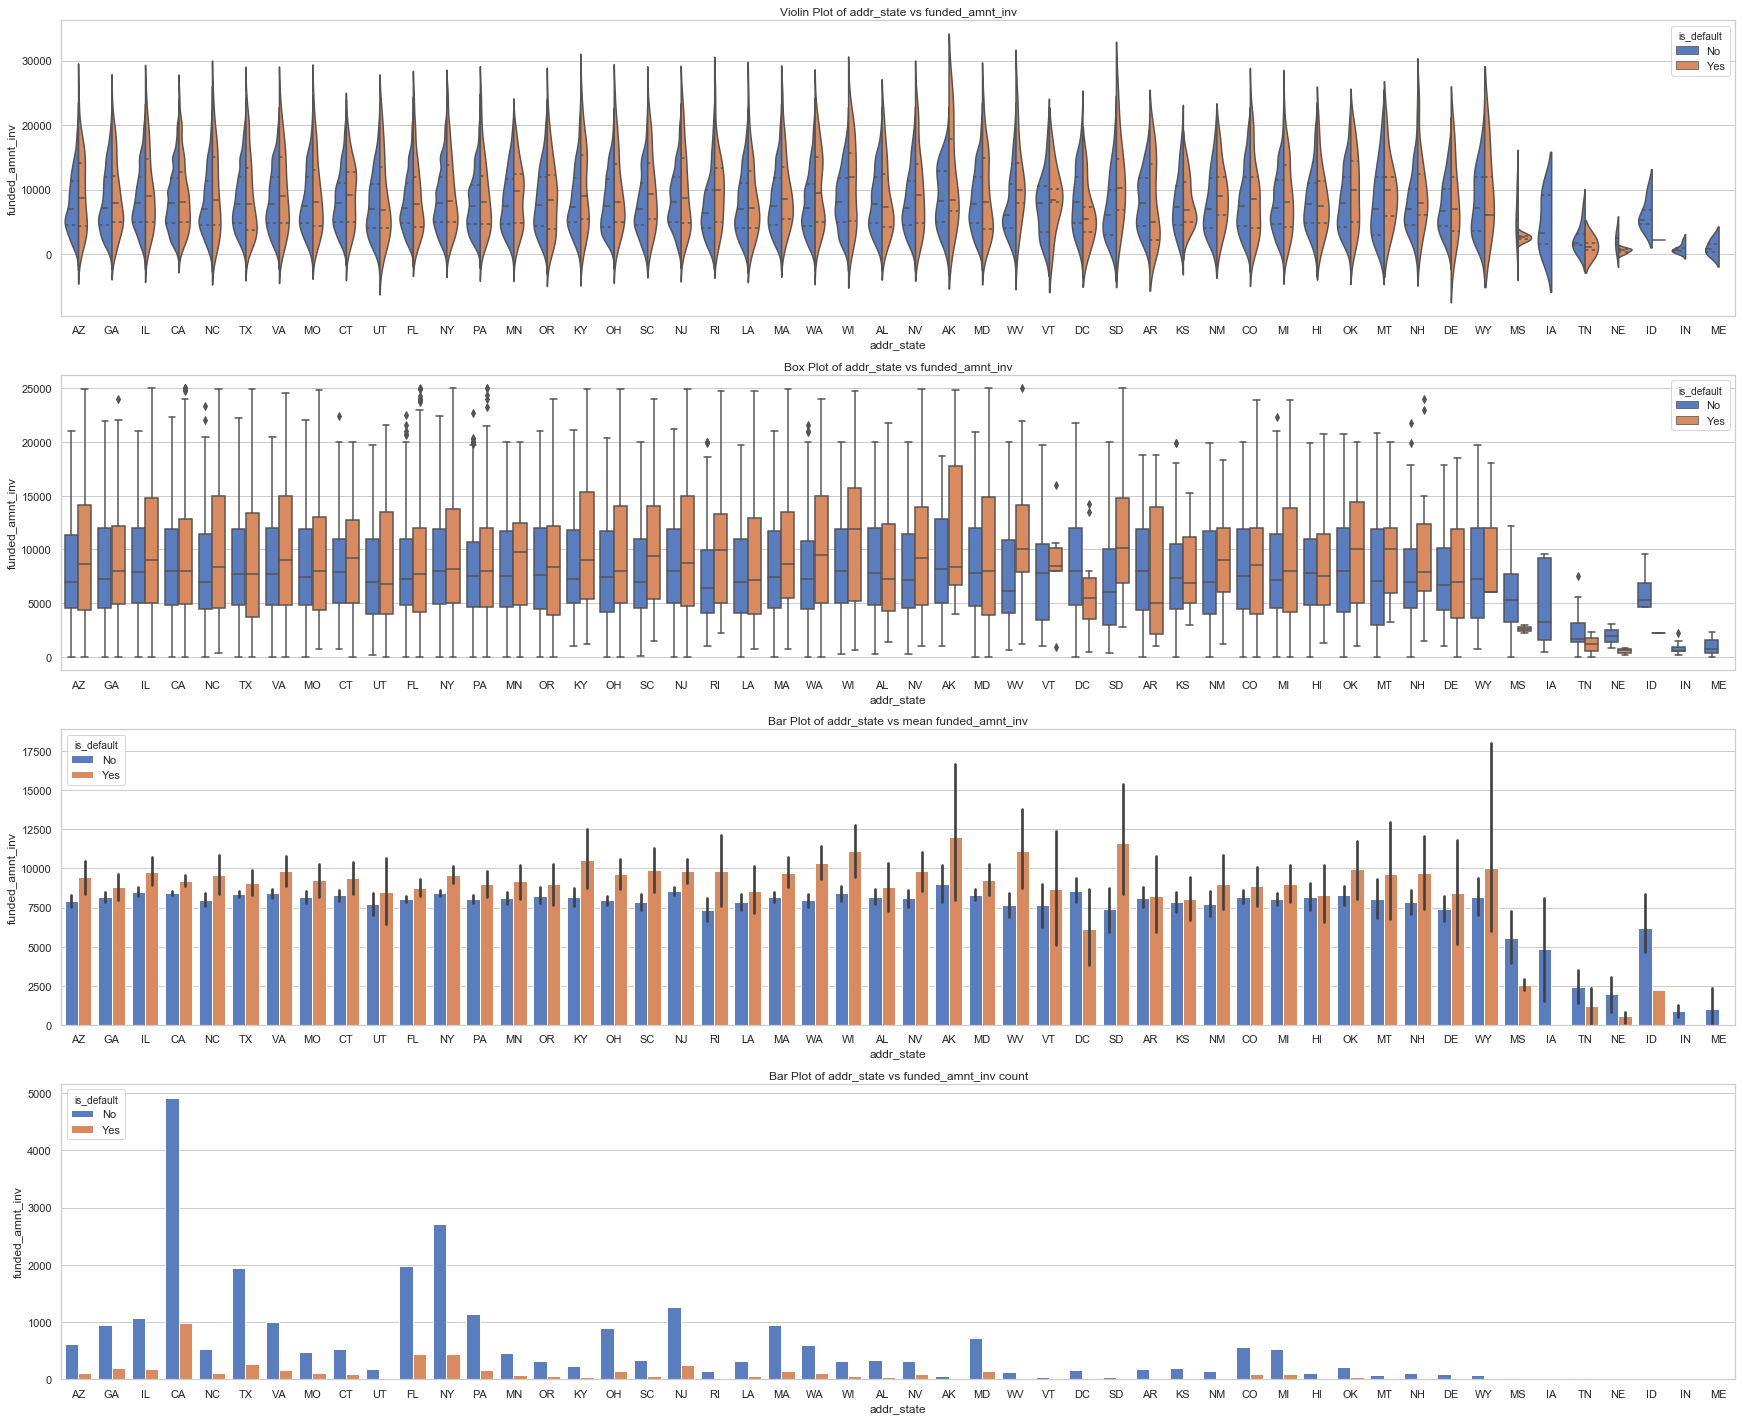

In [155]:
plt.figure(figsize=(30,25))
plt.subplot(411)
sns.violinplot(x='addr_state',y='funded_amnt_inv',hue='is_default',data=loanDf,split=True,inner='quart')
plt.title('Violin Plot of addr_state vs funded_amnt_inv')
plt.subplot(412)
sns.boxplot(x='addr_state',y='funded_amnt_inv', hue='is_default',data=loanDf)
plt.title('Box Plot of addr_state vs funded_amnt_inv')
plt.subplot(413)
sns.barplot(x='addr_state', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.mean)
plt.title('Bar Plot of addr_state vs mean funded_amnt_inv')
plt.subplot(414)
sns.barplot(x='addr_state', y='funded_amnt_inv', hue='is_default', data=loanDf, estimator=np.size)
plt.title('Bar Plot of addr_state vs funded_amnt_inv count')

**Observation:** *Highest number of loans are applied in CA state where the number of loans to get defaulted are likely to be the highest.*
    

**zip code vs funded_amnt_inv** ***(For the state having highest loan defaulter)***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

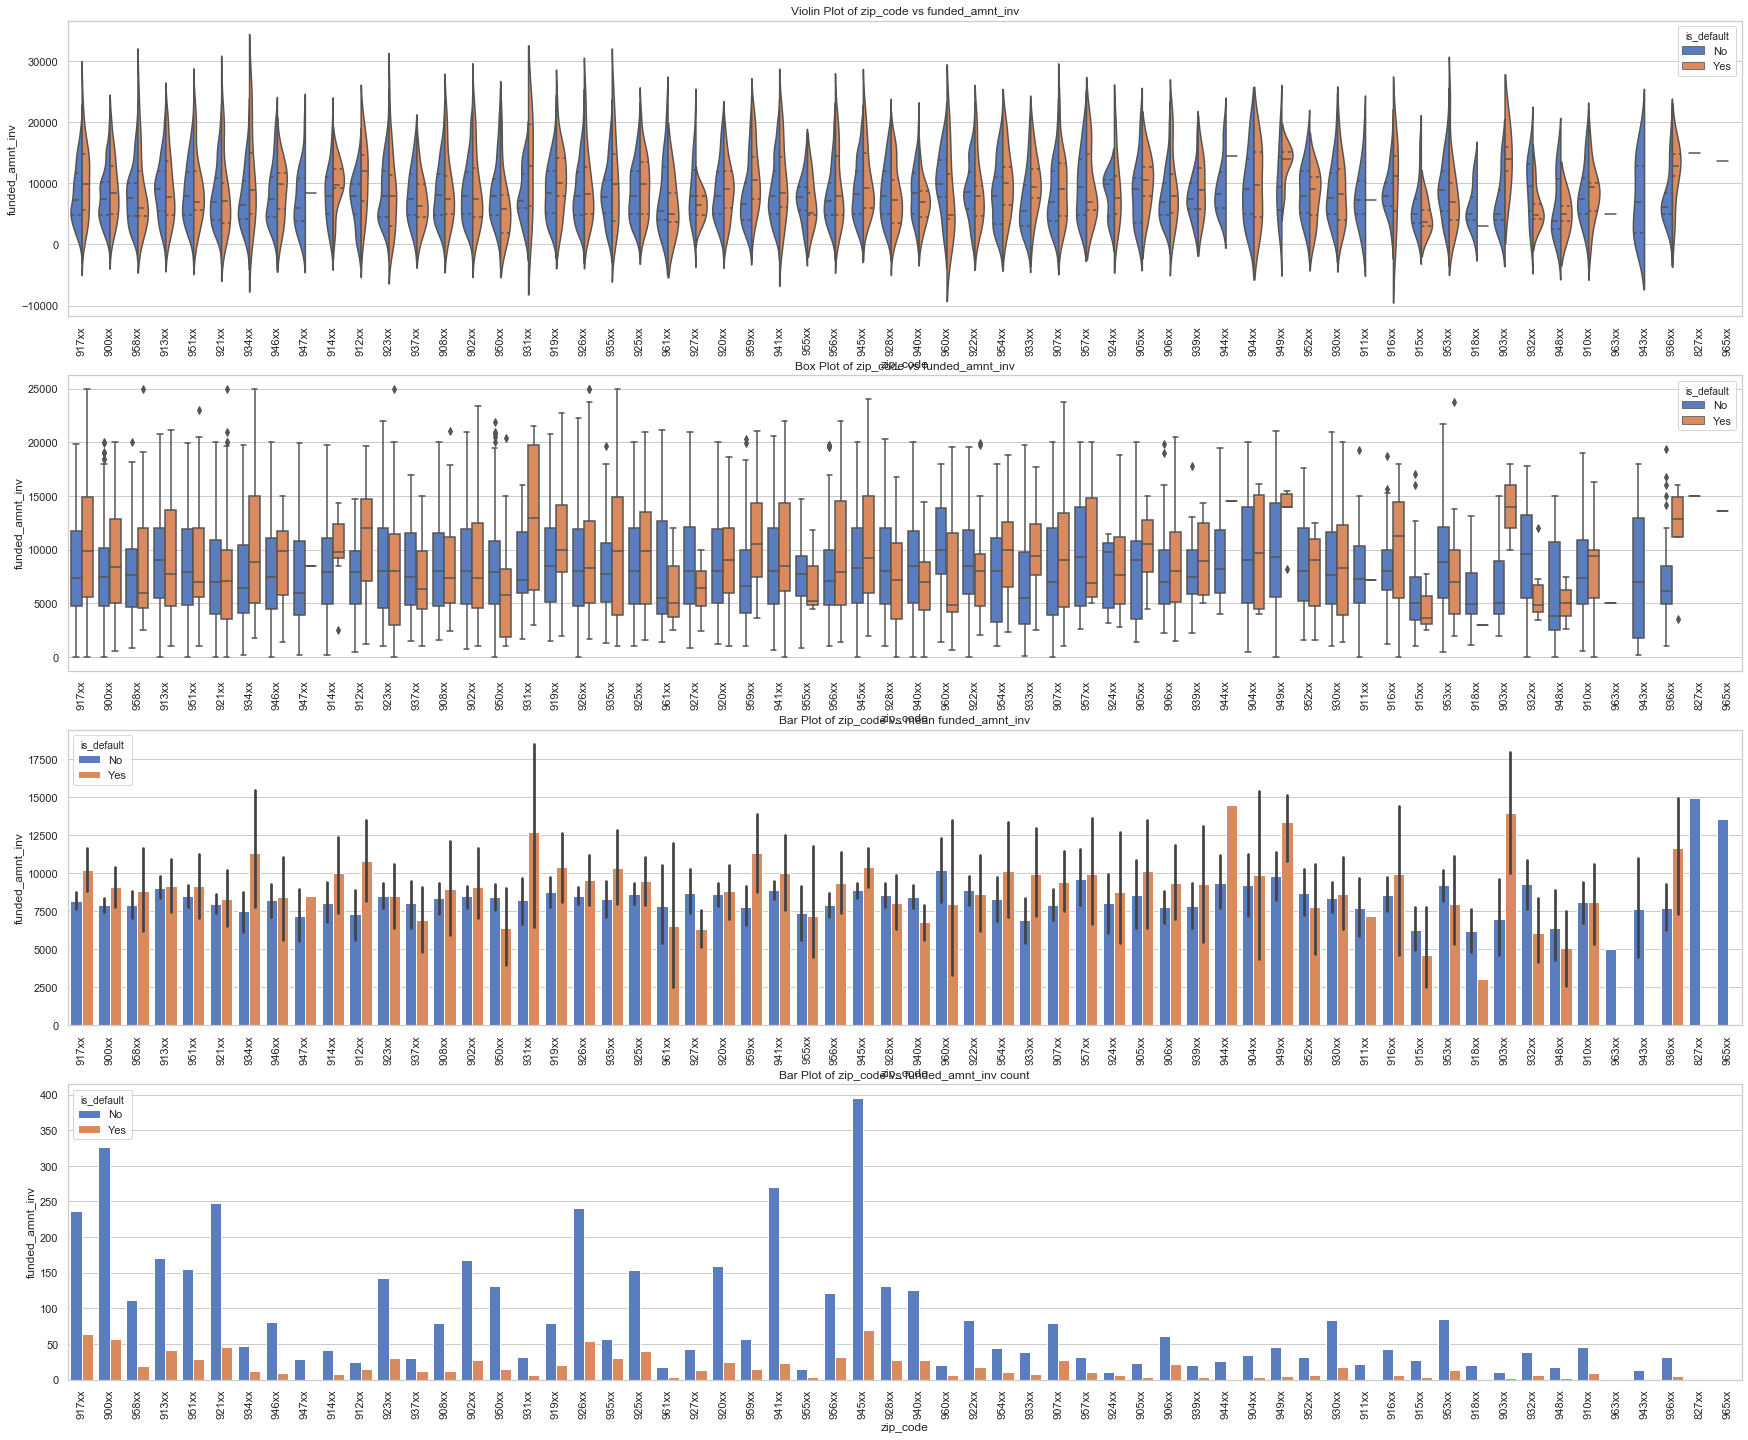

In [156]:
plt.figure(figsize=(30,25))
plt.subplot(411)
sns.violinplot(x='zip_code',y='funded_amnt_inv',hue='is_default',data=loanDf[loanDf.addr_state=='CA'],split=True,inner='quart')
plt.title('Violin Plot of zip_code vs funded_amnt_inv')
plt.xticks(rotation=90)
plt.subplot(412)
sns.boxplot(x='zip_code',y='funded_amnt_inv', hue='is_default',data=loanDf[loanDf.addr_state=='CA'])
plt.title('Box Plot of zip_code vs funded_amnt_inv')
plt.xticks(rotation=90)
plt.subplot(413)
sns.barplot(x='zip_code', y='funded_amnt_inv', hue='is_default', data=loanDf[loanDf.addr_state=='CA'], estimator=np.mean)
plt.title('Bar Plot of zip_code vs mean funded_amnt_inv')
plt.xticks(rotation=90)
plt.subplot(414)
sns.barplot(x='zip_code', y='funded_amnt_inv', hue='is_default', data=loanDf[loanDf.addr_state=='CA'], estimator=np.size)
plt.title('Bar Plot of zip_code vs funded_amnt_inv count')
plt.xticks(rotation=90)

**Observation:** *As State CA has highest default loan, therefore the analysis for zip code is conducted for state CA. It is found that top three default zip codes are 945xx, 917xx and 900xx respectively.*

In [157]:
# Correlation
round(loanDf.corr(),2)

loan_amnt  funded_amnt  funded_amnt_inv  \
loan_amnt                                1.00         0.97             0.91   
funded_amnt                              0.97         1.00             0.94   
funded_amnt_inv                          0.91         0.94             1.00   
term                                     0.27         0.24             0.27   
int_rate                                 0.16         0.17             0.17   
installment                              0.91         0.95             0.88   
annual_inc                               0.31         0.30             0.29   
dti                                      0.08         0.08             0.09   
total_acc                                0.21         0.20             0.19   
total_pymnt                              0.83         0.85             0.81   
total_pymnt_inv                          0.78         0.80             0.87   
total_rec_prncp                          0.78         0.80             0.76   
total_rec_int                            0.65         0.66             0.64   
last_pymnt_amnt                          0.38         0.38             0.37   
issue_dt_Yr                              0.04         0.06             0.23   
issue_dt_Mth                             0.04         0.02             0.05   
loan_amnt_to_funded_amnt_inv_ratio      -0.15        -0.06             0.22   
int_rate_SquaredOff                      0.16         0.17             0.17   
annual_inc_Squared_To_Nearest_10k        0.31         0.30             0.29   
total_pymnt_by_1000                      0.83         0.85             0.81   
installment_rounded_off                  0.91         0.95             0.88   

                                    term  int_rate  installment  annual_inc  \
loan_amnt                           0.27      0.16         0.91        0.31   
funded_amnt                         0.24      0.17         0.95        0.30   
funded_amnt_inv                     0.27      0.17         0.88        0.29   
term                                1.00      0.39        -0.02        0.03   
int_rate                            0.39      1.00         0.15       -0.03   
installment                        -0.02      0.15         1.00        0.30   
annual_inc                          0.03     -0.03         0.30        1.00   
dti                                 0.06      0.09         0.07       -0.09   
total_acc                           0.06     -0.12         0.17        0.38   
total_pymnt                         0.19      0.13         0.82        0.30   
total_pymnt_inv                     0.22      0.13         0.76        0.28   
total_rec_prncp                     0.07      0.01         0.80        0.30   
total_rec_int                       0.49      0.49         0.56        0.17   
last_pymnt_amnt                     0.18      0.07         0.33        0.16   
issue_dt_Yr                         0.20     -0.00        -0.01        0.02   
issue_dt_Mth                        0.02      0.02         0.01        0.01   
loan_amnt_to_funded_amnt_inv_ratio  0.05      0.03        -0.08       -0.04   
int_rate_SquaredOff                 0.39      1.00         0.15       -0.02   
annual_inc_Squared_To_Nearest_10k   0.03     -0.03         0.30        0.99   
total_pymnt_by_1000                 0.19      0.13         0.82        0.29   
installment_rounded_off            -0.02      0.15         1.00        0.30   

                                     dti  total_acc  total_pymnt  \
loan_amnt                           0.08       0.21         0.83   
funded_amnt                         0.08       0.20         0.85   
funded_amnt_inv                     0.09       0.19         0.81   
term                                0.06       0.06         0.19   
int_rate                            0.09      -0.12         0.13   
installment                         0.07       0.17         0.82   
annual_inc                         -0.09       0.38         0.30   
dti           

(21.0, 0.0)

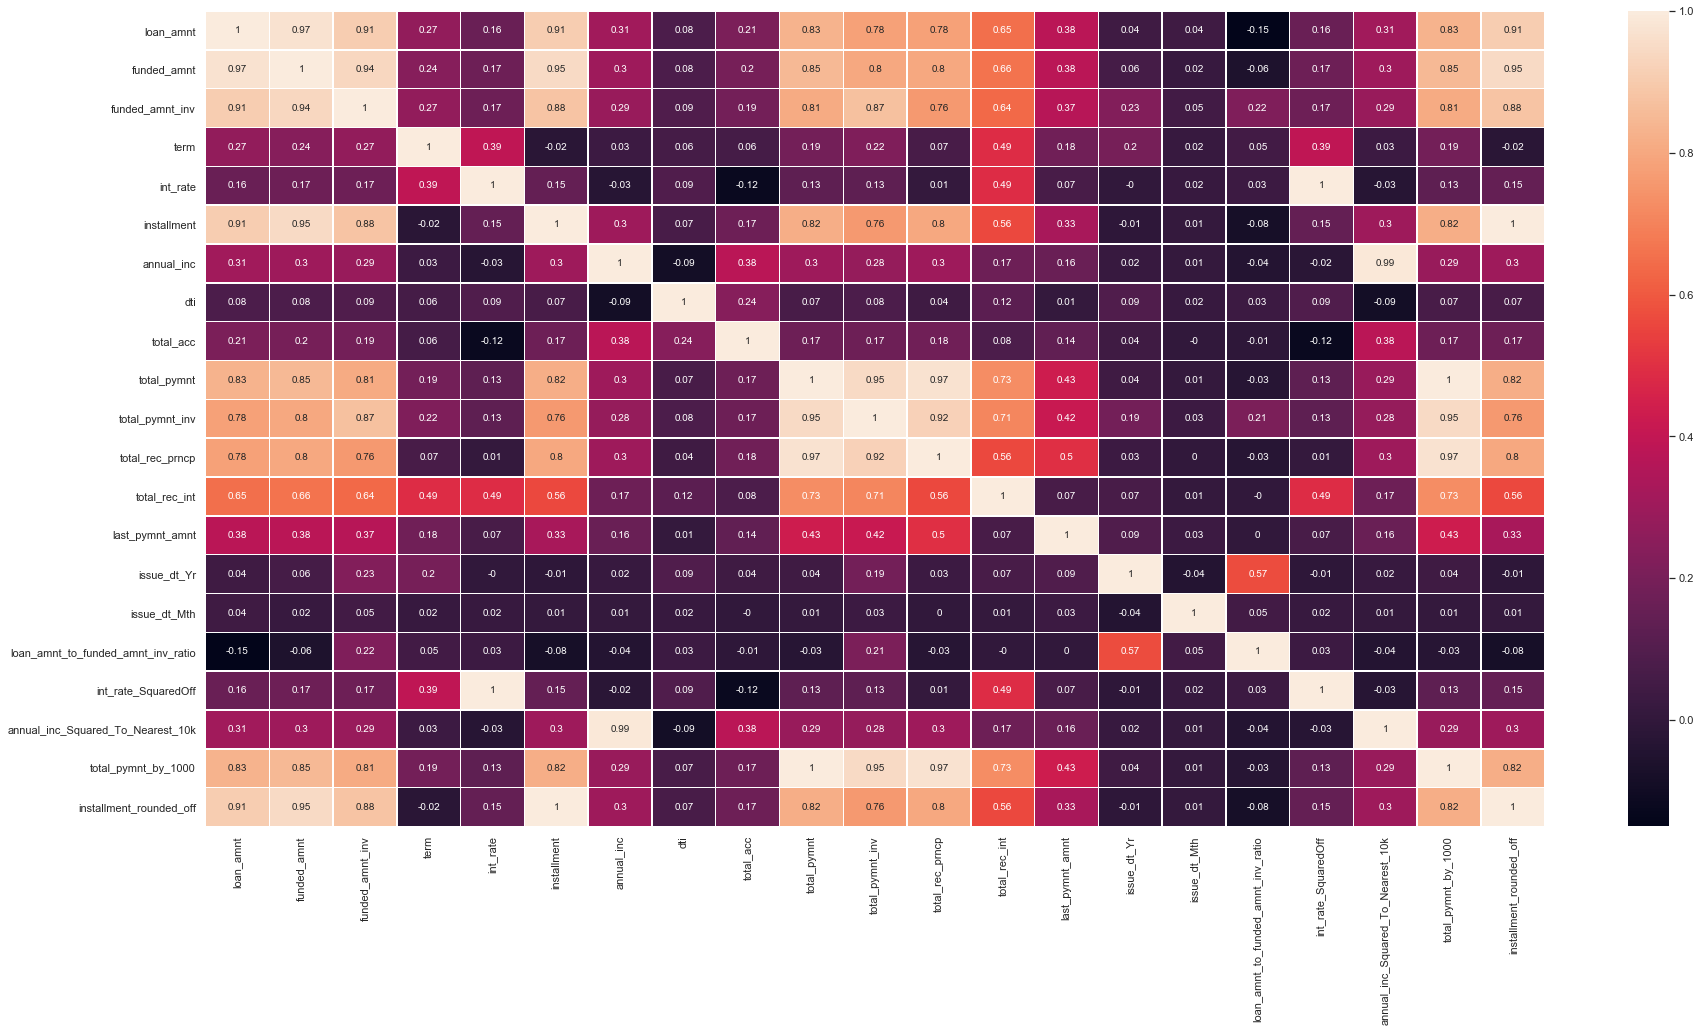

In [158]:
plt.figure(figsize=(30, 15))
ax = sns.heatmap(round(loanDf.corr(),2), annot = True,linewidth=0.5)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

<Figure size 2160x720 with 0 Axes>

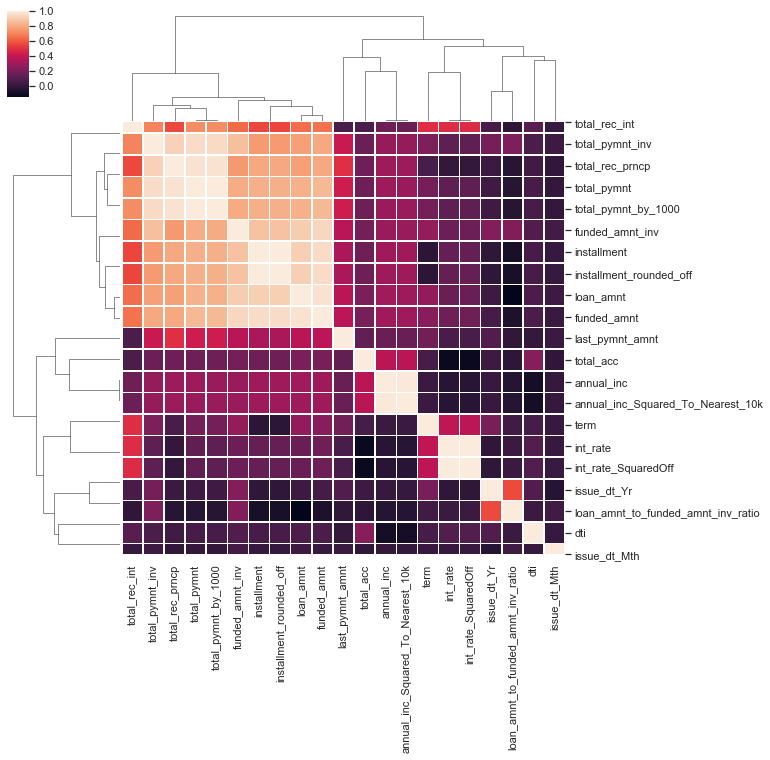

In [159]:
plt.figure(figsize=(30, 10))
ax = sns.clustermap(loanDf.corr(),linewidth=0.5)

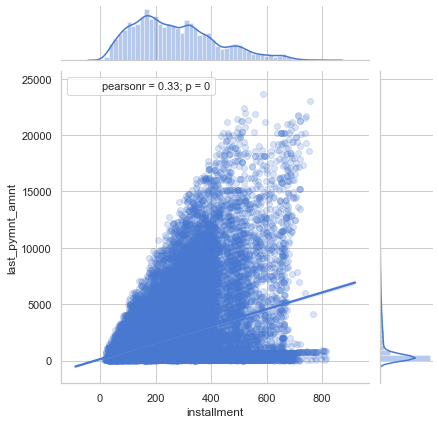

In [160]:
sns.jointplot(x='installment',y='last_pymnt_amnt',data = loanDf,kind='reg',scatter_kws={"alpha": 0.2}).annotate(stats.pearsonr)

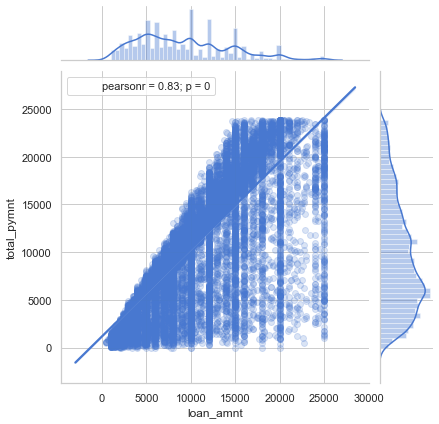

In [161]:
sns.jointplot(x='loan_amnt',y='total_pymnt',data = loanDf,kind='reg',scatter_kws={"alpha": 0.2}).annotate(stats.pearsonr)

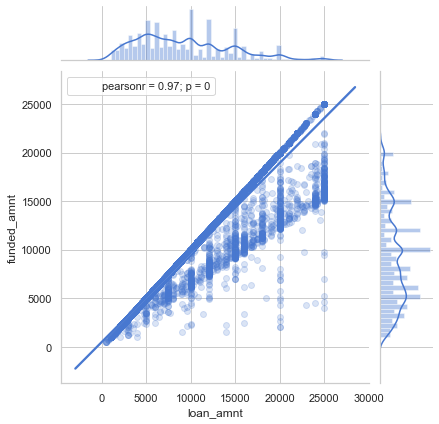

In [162]:
sns.jointplot(x='loan_amnt',y='funded_amnt',data = loanDf,kind='reg',scatter_kws={"alpha": 0.2}).annotate(stats.pearsonr)

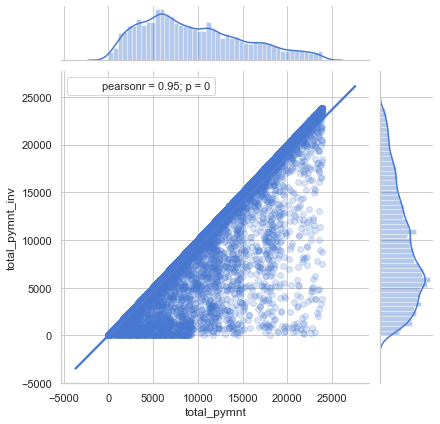

In [163]:
sns.jointplot(x='total_pymnt',y='total_pymnt_inv',data=loanDf,kind='reg',scatter_kws={"alpha": 0.2}).annotate(stats.pearsonr)